In [1013]:
%pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [1014]:
import pandas as pd


file_path = r"27521-0001-Data.tsv"
data = pd.read_csv(file_path, sep='\t')

In [1015]:

basic_info = {
    "Number of Rows": data.shape[0],
    "Number of Columns": data.shape[1],
    "Missing Values Summary": data.isnull().sum().sum(),
}

basic_info

{'Number of Rows': 55602,
 'Number of Columns': 3011,
 'Missing Values Summary': 0}

In [1016]:
data.isna().sum()

CASEID      0
QUESTID     0
CIGEVER     0
CIGOFRSM    0
CIGWILYR    0
           ..
DRUGSALE    0
ALLARRST    0
SAXMDE      0
MDEGT12M    0
SAXMDEGT    0
Length: 3011, dtype: int64

In [1017]:
data.info()
# Wszystkie kolumny to kolumny numeryczne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55602 entries, 0 to 55601
Columns: 3011 entries, CASEID to SAXMDEGT
dtypes: float64(48), int64(2963)
memory usage: 1.2 GB


In [1018]:

key_columns = ['DEPRESSIONINDEX', 'DEPEPISODE', 'MDELASTYR', 'ANYTXRXMDE']

key_stats = data[key_columns].describe(include='all')

key_stats

,DEPRESSIONINDEX,DEPEPISODE,MDELASTYR,ANYTXRXMDE
count,55602.0000,55602.0000,55602.0000,55602.0000
mean,-2.2104,-0.2380,-0.2799,-3.0260
std,5.3092,0.6240,0.5724,4.3026
min,-9.0000,-1.0000,-1.0000,-9.0000
25%,-9.0000,-1.0000,-1.0000,-9.0000
50%,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.0000,0.0000,0.0000
max,9.0000,1.0000,1.0000,1.0000


In [1019]:

selected_data = data[key_columns]
unique_values = {col: selected_data[col].unique() for col in key_columns}
distribution_stats = selected_data.describe()

missing_values_handling = {
    col: selected_data[col].value_counts().get(-9, 0) + selected_data[col].value_counts().get(-8, 0) + selected_data[col].value_counts().get(-1, 0)
    for col in key_columns
}

{
    "Unique Values": unique_values,
    "Distribution Stats": distribution_stats,
    "Missing Values (-9, -8)": missing_values_handling
}

{'Unique Values': {'DEPRESSIONINDEX': array([ 0,  5, -9,  9,  7,  8,  4,  3,  6,  1,  2], dtype=int64),
  'DEPEPISODE': array([ 0,  1, -1], dtype=int64),
  'MDELASTYR': array([ 0, -1,  1], dtype=int64),
  'ANYTXRXMDE': array([ 0, -9,  1], dtype=int64)},
 'Distribution Stats':        DEPRESSIONINDEX  DEPEPISODE  MDELASTYR  ANYTXRXMDE
 count       55602.0000  55602.0000 55602.0000  55602.0000
 mean           -2.2104     -0.2380    -0.2799     -3.0260
 std             5.3092      0.6240     0.5724      4.3026
 min            -9.0000     -1.0000    -1.0000     -9.0000
 25%            -9.0000     -1.0000    -1.0000     -9.0000
 50%             0.0000      0.0000     0.0000      0.0000
 75%             0.0000      0.0000     0.0000      0.0000
 max             9.0000      1.0000     1.0000      1.0000,
 'Missing Values (-9, -8)': {'DEPRESSIONINDEX': 18630,
  'DEPEPISODE': 19019,
  'MDELASTYR': 19070,
  'ANYTXRXMDE': 18963}}

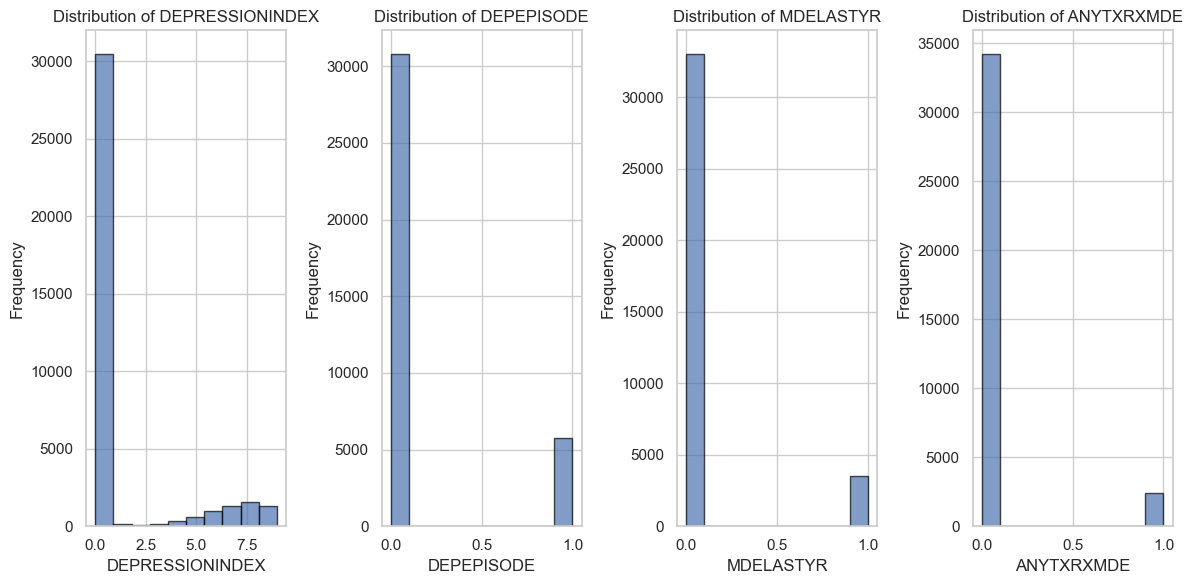

,DEPRESSIONINDEX,DEPEPISODE,MDELASTYR,ANYTXRXMDE
count,36972,36583,36532,36639
unique,10,2,2,2
top,0,0,0,0
freq,30459,30800,33026,34224


In [1020]:
import matplotlib.pyplot as plt

cleaned_data = selected_data.replace({-9: None, -8: None, -1: None})
cleaned_distribution_stats = cleaned_data.describe()


plt.figure(figsize=(12, 6))

for i, col in enumerate(cleaned_data.columns, 1):
    plt.subplot(1, 4, i)
    cleaned_data[col].dropna().plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

cleaned_distribution_stats


DEPRESSIONINDEX - Wartość 0 dominuje (ponad 30000 obserwacji), co wiąże się z brakiem objawów depresji u większości badanych
DEPEPISODE - Doświadczenie epizodu depresji w ciągu całego życia dotyczyło około 6000 osób. 
MDELASTYR - Większość nie doświadczyła epizodu depresji w ostatnim roku.
ANYTXRXMDE -Większość nie miała leczenia depresji.
Rozkład zmiennych jest mocno skośny, z dominującymi wartościami "brak depresji" lub "brak leczenia".

In [1021]:
#Wybrany wskaźnik DEPRESSIONINDEX pozbawionym brakow danych
data['DEPRESSIONINDEX'] = data['DEPRESSIONINDEX'].replace({-9: None, -8: None, -1: None})
data = data.dropna().reset_index(drop=True)
data

,CASEID,QUESTID,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,LARCENY,MTRTHEFT,FRAUD,PROPCRME,DRUG,DRUGSALE,ALLARRST,SAXMDE,MDEGT12M,SAXMDEGT
0,1,2000033,1,99,99,18,9999,99,1,3,...,0,0,0,0,0,0,0,0,0,0
1,2,2000140,1,99,99,13,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
2,3,2000202,1,99,99,28,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
3,4,2000220,1,99,99,12,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
4,5,2000257,1,99,99,12,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36967,55594,7171623,1,99,99,15,9999,99,4,93,...,0,0,0,0,0,0,0,0,0,0
36968,55595,7171641,2,99,99,991,9991,91,91,91,...,0,0,0,0,0,0,0,0,0,0
36969,55597,7171669,1,99,99,18,9999,99,1,4,...,0,0,0,0,0,0,0,0,0,0
36970,55599,7171703,1,99,99,20,9999,99,1,30,...,0,0,0,0,0,0,0,0,0,0


 Porównanie wskaźników depresji w zależności od grup wiekowych (CATAG2) i płci (IRSEX). Zbiór danych został podzielony na przedziały wiekowe 1: 12-17, 2: 18-25, 3: 26 lub starsi

In [1022]:
data['CATAG2'].value_counts()

demographic_columns = ['CATAG2', 'IRSEX', 'DEPRESSIONINDEX']
demographic_data = data[demographic_columns]

grouped_depression = demographic_data.groupby(['CATAG2', 'IRSEX'])['DEPRESSIONINDEX'].mean()

grouped_depression_reset = grouped_depression.reset_index()

grouped_depression_reset

,CATAG2,IRSEX,DEPRESSIONINDEX
0,1,1,0.6793
1,1,2,1.5624
2,2,1,0.9634
3,2,2,1.6979
4,3,1,0.8769
5,3,2,1.5850


Grupa wiekowa 12–17 lat:
Mężczyźni: średni wskaźnik depresji wynosi 0.68.
Kobiety: średni wskaźnik depresji wynosi 1.56.
    
Grupa wiekowa 18–25 lat:
Mężczyźni: średni wskaźnik depresji wynosi 0.96.
Kobiety: średni wskaźnik depresji wynosi 1.7.
    
Grupa wiekowa powyżej 25 lat:
Mężczyźni: średni wskaźnik depresji wynosi 0.87.
Kobiety: średni wskaźnik depresji wynosi 1.58.
    
Kobiety mają wyraźnie wyższy wskaźnik depresji we wszystkich grupach wiekowych.Wskaźnik depresji jest najwyższy w grupie wiekowej 18–25 lat, niezależnie od płci.

In [1023]:
from scipy.stats import f_oneway

# Przygotowanie danych do testu ANOVA: wskaźnik depresji w grupach wiekowych i płciowych
group_1_male = demographic_data[(demographic_data['CATAG2'] == 1) & (demographic_data['IRSEX'] == 1)]['DEPRESSIONINDEX'].dropna()
group_1_female = demographic_data[(demographic_data['CATAG2'] == 1) & (demographic_data['IRSEX'] == 2)]['DEPRESSIONINDEX'].dropna()
group_2_male = demographic_data[(demographic_data['CATAG2'] == 2) & (demographic_data['IRSEX'] == 1)]['DEPRESSIONINDEX'].dropna()
group_2_female = demographic_data[(demographic_data['CATAG2'] == 2) & (demographic_data['IRSEX'] == 2)]['DEPRESSIONINDEX'].dropna()
group_3_male = demographic_data[(demographic_data['CATAG2'] == 3) & (demographic_data['IRSEX'] == 1)]['DEPRESSIONINDEX'].dropna()
group_3_female = demographic_data[(demographic_data['CATAG2'] == 3) & (demographic_data['IRSEX'] == 2)]['DEPRESSIONINDEX'].dropna()
anova_result = f_oneway(group_1_male, group_1_female, group_2_male, group_2_female, group_3_male, group_3_female)
anova_result

F_onewayResult(statistic=175.1223329181767, pvalue=8.032443353812516e-185)

Na podstawie przeprowadzonej analizy wariancji (ANOVA) uzyskano wynik statystyki F = 175,122 przy bardzo niskiej wartości p. Wynik ten wskazuje na istnienie istotnych statystycznie różnic w średnich poziomach wskaźnika depresji pomiędzy różnymi grupami wiekowymi oraz płciowymi (p < 0,05). 

In [1024]:

final_cols = ['CATAG7', 'IRSEX']

In [1025]:
data['NEWRACE2'].value_counts()

race_depression = data.groupby('NEWRACE2')['DEPRESSIONINDEX'].mean().reset_index()
race_depression.columns = ['NEWRACE2', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy NEWRACE2:")
print(race_depression)


Średni wskaźnik depresji dla każdej grupy NEWRACE2:
   NEWRACE2  MeanDepressionIndex
0         1               1.2635
1         2               1.0094
2         3               1.0639
3         4               1.1479
4         5               0.9845
5         6               1.5780
6         7               1.1392


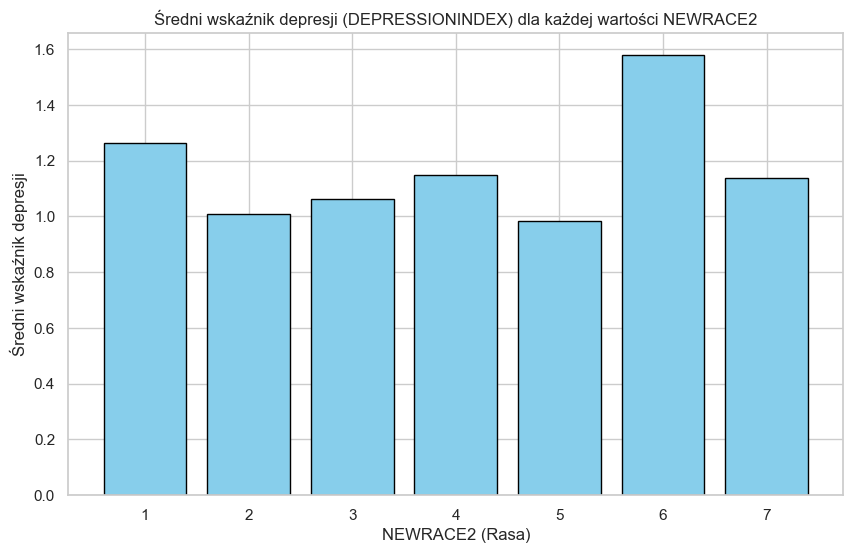

In [1026]:
plt.figure(figsize=(10, 6))
plt.bar(race_depression['NEWRACE2'], race_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości NEWRACE2')
plt.xlabel('NEWRACE2 (Rasa)')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(race_depression['NEWRACE2'])
plt.show()

 Na bazie powyższego wykresu można zaobserwować różnice w średnich wskaźnikach depresji (DEPRESSIONINDEX) pomiędzy grupami rasowymi/etnicznymi (NEWRACE2). Najwyższy średni wskaźnik depresji odnotowano w grupie osób niebędących Hiszpanami, deklarujących przynależność do więcej niż jednej rasy  (1.578), natomiast najniższy wśród osób niebędących Hiszpanami pochodzenia azjatyckiego (0.984).

In [1027]:
final_cols.append('NEWRACE2')

Analiza kolumny ANYINDEX - wskaźnik uzależnienia od dowolnego rodzaju narkotyków 0-1


Średni wskaźnik depresji dla każdej grupy ANYINDEX:
    ANYINDEX  MeanDepressionIndex
0     0.1429               1.1119
1     0.1667               1.5427
2     0.2857               2.9356
3     0.3333               1.7758
4     0.4286               3.1858
5     0.5000               2.1114
6     0.5714               3.2054
7     0.6667               2.6693
8     0.7143               3.3977
9     0.8333               2.9120
10    0.8571               4.4054
11    1.0000               4.7794


Text(0, 0.5, 'MeanDepressionIndex')

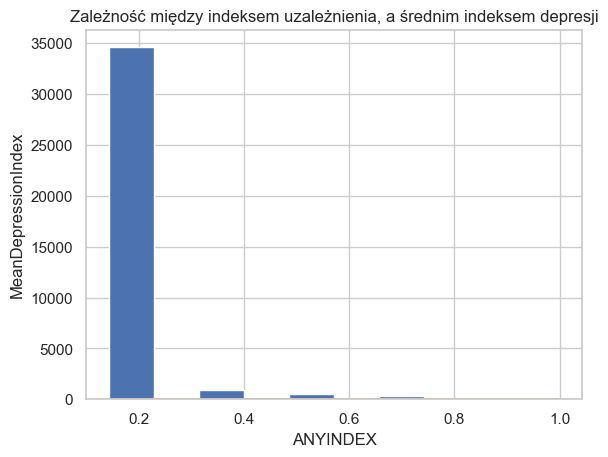

In [1028]:

data['ANYINDEX'].isna().sum()
data['ANYINDEX'].value_counts()
data = data[data['ANYINDEX'] >= 0].reset_index(drop=True)
data['ANYINDEX'].hist()

ANYINDEX_depression = data.groupby('ANYINDEX')['DEPRESSIONINDEX'].mean().reset_index()
ANYINDEX_depression.columns = ['ANYINDEX', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy ANYINDEX:")
print(ANYINDEX_depression)

plt.plot(ANYINDEX_depression['ANYINDEX'], ANYINDEX_depression['MeanDepressionIndex'])
plt.title('Zależność między indeksem uzależnienia, a średnim indeksem depresji')
plt.xlabel('ANYINDEX')
plt.ylabel('MeanDepressionIndex')

Można zaobserwować ogólną tendencję wzrostu średniego wskaźnika depresji (MeanDepressionIndex) wraz ze wzrostem poziomu uzależnienia od narkotyków (ANYINDEX), jednak zależność nie wykazuje charakteru liniowego. Najwyższe wartości depresji odnotowano dla wartości ANYINDEX równych 1.0 (M = 4.779) oraz 0.857 (M = 4.405). 
Kolumna pozwala wyróżnić 12 poziomów uzależnienia, co może pomóc w budowie  modeli klasyfikacyjnych lub regresyjnych.

Text(0, 0.5, 'MeanDepressionIndex')

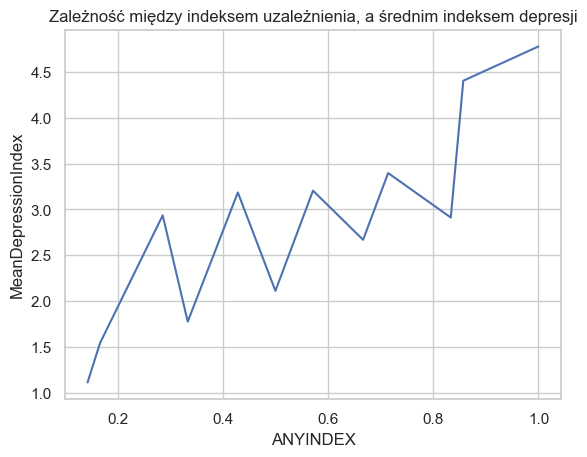

In [1029]:
plt.plot(ANYINDEX_depression['ANYINDEX'], ANYINDEX_depression['MeanDepressionIndex'])
plt.title('Zależność między indeksem uzależnienia, a średnim indeksem depresji')
plt.xlabel('ANYINDEX')
plt.ylabel('MeanDepressionIndex') 

In [1030]:

final_cols.append('ANYINDEX')

Dalsza analiza obejmuje  kolumny związane z używaniem narkotyków ('MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 'COKECRACK', 'OTHERILLICIT'), na podstawie których utworzono zmienną DRUGS_BIN (0/1) wskazującą na uzależnienie od narkotyków. Jednak za pomocą metody feature importance w algorytmie Random Forest oraz ocenie wpływu na metryki modelu, w szczególności na wskaźnik recall, okazało się, że zmienne ILLICITDRUGUSE i OTHERILLICIT mają większe znaczenie dla modelu niż nowo utworzona cecha.

In [1031]:
data['COKECRACK'].value_counts()

 0    33282
 1     2730
-1      931
Name: COKECRACK, dtype: int64

0    20914
1    16029
Name: DRUGS_BIN, dtype: int64

Średni wskaźnik depresji dla każdej grupy DRUGS_BIN:
   DRUGS_BIN  MeanDepressionIndex
0          0               0.7742
1          1               1.7808


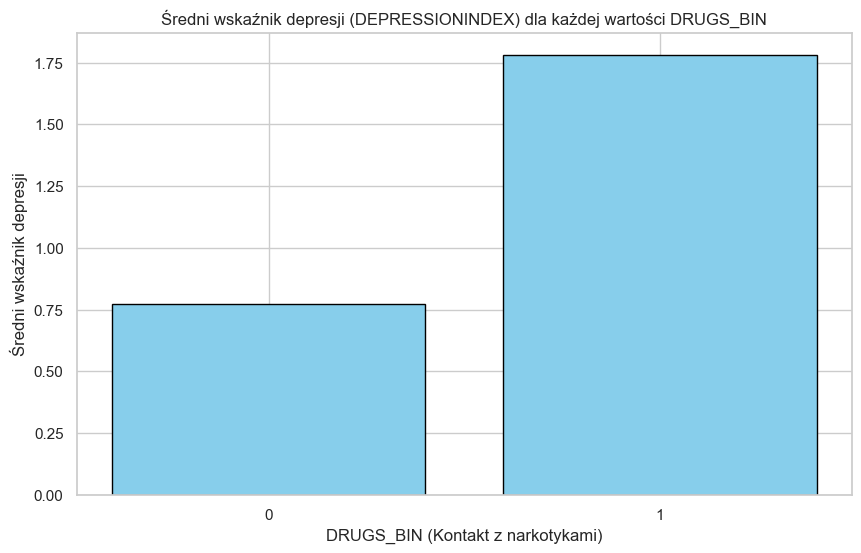

In [1032]:

drug_columns = ['MJANDCOKE', 'ILLICITDRUGUSE', 'LSYRILLICIT', 'COKECRACK', 'OTHERILLICIT']
data['DRUGS_BIN'] = data[drug_columns].any(axis=1).astype(int)
print(data['DRUGS_BIN'].value_counts())

drugs_depression = data.groupby('DRUGS_BIN')['DEPRESSIONINDEX'].mean().reset_index()
drugs_depression.columns = ['DRUGS_BIN', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy DRUGS_BIN:")
print(drugs_depression)


plt.figure(figsize=(10, 6))
plt.bar(drugs_depression['DRUGS_BIN'], drugs_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości DRUGS_BIN')
plt.xlabel('DRUGS_BIN (Kontakt z narkotykami)')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(drugs_depression['DRUGS_BIN'])
plt.show()


Osoby mające kontakt z narkotykami mają wyższy średni wskaźnik depresji (M = 1.781) niż osoby nieuzależnione ( M = 0.774), co wskazuje na istotny związek między uzależnieniem a depresją.

Zbiór danych zawiera trzy kolumny dotyczące zażywania narkotyków w ciągu ostatniego roku: MARJLTYR, MJCOKELY i COCCRKLY. Analiza tych zmiennych pozwoli ocenić, czy określone rodzaje narkotyków mają większy wpływ na poziom depresji niż inne.

In [1033]:

final_cols.append('DPILLALC')
final_cols.append('ANYILLICITRC')

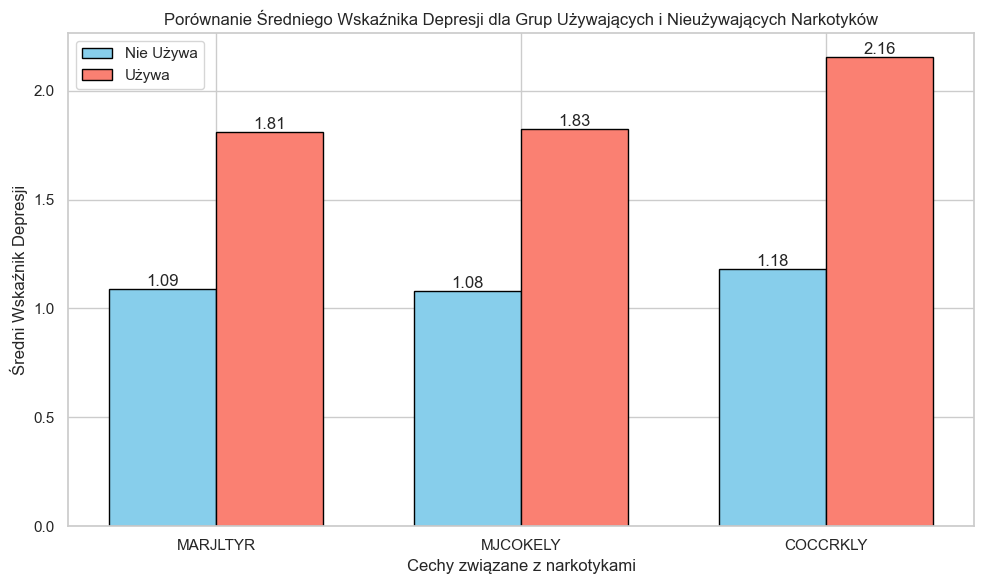

In [1034]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



depression_marjltyr = data.groupby('MARJLTYR')['DEPRESSIONINDEX'].mean().reset_index()
depression_mjcokely = data.groupby('MJCOKELY')['DEPRESSIONINDEX'].mean().reset_index()
depression_coccrkly = data.groupby('COCCRKLY')['DEPRESSIONINDEX'].mean().reset_index()


depression_summary = pd.DataFrame({
    'Substancja': ['MARJLTYR', 'MJCOKELY', 'COCCRKLY'],
    'Nie Używa': [
        depression_marjltyr[depression_marjltyr['MARJLTYR'] == 0]['DEPRESSIONINDEX'].values[0],
        depression_mjcokely[depression_mjcokely['MJCOKELY'] == 0]['DEPRESSIONINDEX'].values[0],
        depression_coccrkly[depression_coccrkly['COCCRKLY'] == 0]['DEPRESSIONINDEX'].values[0]
    ],
    'Używa': [
        depression_marjltyr[depression_marjltyr['MARJLTYR'] == 1]['DEPRESSIONINDEX'].values[0],
        depression_mjcokely[depression_mjcokely['MJCOKELY'] == 1]['DEPRESSIONINDEX'].values[0],
        depression_coccrkly[depression_coccrkly['COCCRKLY'] == 1]['DEPRESSIONINDEX'].values[0]
    ]
})

bar_width = 0.35
index = np.arange(len(depression_summary['Substancja']))


plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, depression_summary['Nie Używa'], bar_width, label='Nie Używa', color='skyblue', edgecolor='black')
bar2 = plt.bar(index + bar_width, depression_summary['Używa'], bar_width, label='Używa', color='salmon', edgecolor='black')


plt.xlabel('Cechy związane z narkotykami')
plt.ylabel('Średni Wskaźnik Depresji')
plt.title('Porównanie Średniego Wskaźnika Depresji dla Grup Używających i Nieużywających Narkotyków')
plt.xticks(index + bar_width / 2, depression_summary['Substancja'])
plt.legend()


for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




In [1035]:
data[['MARJLTYR', 'MJCOKELY', 'COCCRKLY', 'DEPRESSIONINDEX']].corr()

C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\182857501.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['MARJLTYR', 'MJCOKELY', 'COCCRKLY', 'DEPRESSIONINDEX']].corr()


,MARJLTYR,MJCOKELY,COCCRKLY
MARJLTYR,1.0000,0.9869,0.3375
MJCOKELY,0.9869,1.0000,0.3900
COCCRKLY,0.3375,0.3900,1.0000


Cechy MARJLTYR i MJCOKELY są bardzo silnie skorelowane (korelacja 0.99), dlatego do dalszej analizy wybrano tylko MJCOKELY i COCCRKLY. Pozwoli to uniknąć nadmiernej zależności między danymi.

In [1036]:
final_cols.append('MJCOKELY')
final_cols.append('COCCRKLY')

Dalsza analiza obejmuje cechy związane z zażywaniem narkotyków od czasu kiedy upłynęło ponad 12 miesięcy: MJGT12MO, COCGT12MO, ANYGT12MO.

In [1037]:

data[['MARJLTYR', 'COCCRKLY', 'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'DEPRESSIONINDEX']].corr()

C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\273110410.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['MARJLTYR', 'COCCRKLY', 'MJGT12MO', 'COCGT12MO', 'ANYGT12MO', 'DEPRESSIONINDEX']].corr()


,MARJLTYR,COCCRKLY,MJGT12MO,COCGT12MO,ANYGT12MO
MARJLTYR,1.0000,0.3375,-0.3455,-0.1592,-0.2117
COCCRKLY,0.3375,1.0000,0.0477,-0.5678,0.0522
MJGT12MO,-0.3455,0.0477,1.0000,0.0459,0.7351
COCGT12MO,-0.1592,-0.5678,0.0459,1.0000,0.0343
ANYGT12MO,-0.2117,0.0522,0.7351,0.0343,1.0000


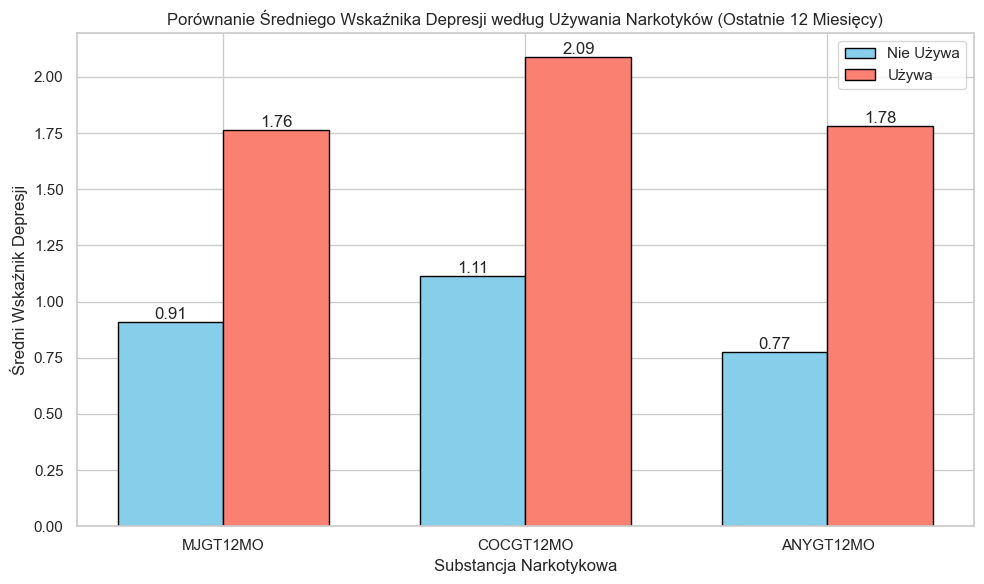

In [1038]:
import numpy as np
drug_cols = ['MJGT12MO', 'COCGT12MO', 'ANYGT12MO']
data[drug_cols] = data[drug_cols].replace({-9: 1})

summary = {
    'Substancja': [],
    'Nie Używa': [],
    'Używa': []
}

for col in drug_cols:
    summary['Substancja'].append(col)
    summary['Nie Używa'].append(data[data[col] == 0]['DEPRESSIONINDEX'].mean())
    summary['Używa'].append(data[data[col] == 1]['DEPRESSIONINDEX'].mean())

summary_df = pd.DataFrame(summary)

bar_width = 0.35
index = np.arange(len(summary_df['Substancja']))

plt.figure(figsize=(10, 6))
plt.bar(index, summary_df['Nie Używa'], bar_width, label='Nie Używa', color='skyblue', edgecolor='black')
plt.bar(index + bar_width, summary_df['Używa'], bar_width, label='Używa', color='salmon', edgecolor='black')

plt.xlabel('Substancja Narkotykowa')
plt.ylabel('Średni Wskaźnik Depresji')
plt.title('Porównanie Średniego Wskaźnika Depresji według Używania Narkotyków (Ostatnie 12 Miesięcy)')
plt.xticks(index + bar_width / 2, summary_df['Substancja'])
plt.legend()

for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [1039]:

final_cols.append('ANYGT12MO')

Analiza dotycząca spożycia alkoholu w tym celu dokonano binaryzacji dla dla kolumny ALCFMFPB i zdefiniowano kolumnę ALCOHOL_BIN. Jednak analiza Feature Importance przy wykorzystaniu modelu Random Forest wykazała, że zmienne związane z używaniem narkotyków (ANYGT12MO, MJGT12MO, COCGT12MO) mają znacznie większy wpływ na wskaźnik depresji niż zmienna dotycząca spożycia alkoholu (ALCOHOL_BIN).

In [1040]:
data['ALCFMFPB'].value_counts() 

2     14244
91    12676
93     8144
1      1362
98      349
83      140
97       19
94        9
Name: ALCFMFPB, dtype: int64

In [1041]:
# Definicja binaryzacji dla kolumny ALCFMFPB
def binary_alcohol(value):
    if value in [1, 94, 97, 98]:  # Pił alkohol
        return 1
    elif value in [2, 83, 91, 93]:  # Nie pił alkoholu
        return 0
    else:  
        return None


data['ALCOHOL_BIN'] = data['ALCFMFPB'].apply(binary_alcohol)
print("Rozkład ALCOHOL_BIN:")
print(data['ALCOHOL_BIN'].value_counts(dropna=False))

alc_depression = data.groupby('ALCOHOL_BIN')['DEPRESSIONINDEX'].mean().reset_index()
alc_depression.columns = ['ALCOHOL_BIN', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy ALCOHOL_BIN:")
print(alc_depression)


Rozkład ALCOHOL_BIN:
0    35204
1     1739
Name: ALCOHOL_BIN, dtype: int64

Średni wskaźnik depresji dla każdej grupy ALCOHOL_BIN:
   ALCOHOL_BIN  MeanDepressionIndex
0            0               1.1619
1            1               2.2036


0    31094
1     5686
Name: ANLEVER, dtype: int64

Średni wskaźnik depresji dla każdej kategorii ANLEVER:
   ANLEVER  MeanDepressionIndex
0        0               1.0327
1        1               2.1989


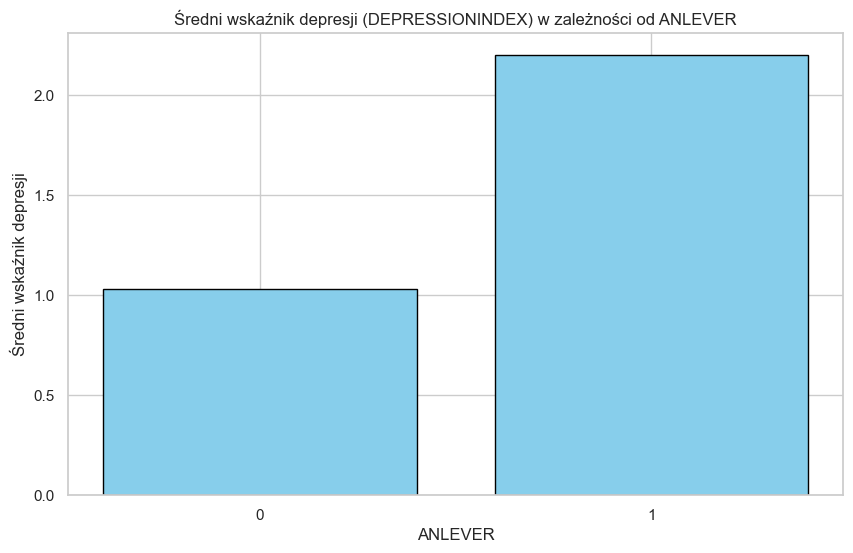

In [1042]:
import numpy as np

data = data[~data['ANLEVER'].isin([97, 98])]
data['ANLEVER'] = data['ANLEVER'].replace({
    81: 0,   
    91: 0,
    1:1  
})

print(data['ANLEVER'].value_counts(dropna=False))

feature_depression_anlever = (
    data.groupby('ANLEVER')['DEPRESSIONINDEX']
    .mean()
    .reset_index()
)
feature_depression_anlever.columns = ['ANLEVER', 'MeanDepressionIndex']

print("\nŚredni wskaźnik depresji dla każdej kategorii ANLEVER:")
print(feature_depression_anlever)

plt.figure(figsize=(10, 6))
plt.bar(
    feature_depression_anlever['ANLEVER'],
    feature_depression_anlever['MeanDepressionIndex'],
    color='skyblue',
    edgecolor='black'
)
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) w zależności od ANLEVER')
plt.xlabel('ANLEVER')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(feature_depression_anlever['ANLEVER'])
plt.show()



 Na podstawie powyższych danych wynika, że osoby deklarujące niezgodne z zaleceniami używanie środków przeciwbólowych mają znacznie wyższy średni wskaźnik depresji (2,20) niż te, które nigdy takich środków w ten sposób nie stosowały. Może to sugerować, że nadużywanie leków przeciwbólowych koreluje z większym natężeniem symptomów depresji.

In [1043]:
final_cols.append('ANLEVER')

Dalsza analiza obejmie czynniki społeczno-ekonomiczne, w tym cechę IREDUC2, która wskazuje poziom wykształcenia respondentów, od najniższego ("Fifth grade or less") do najwyższego ("Senior/16th year or GradProf School or higher").

In [1044]:
data['IREDUC2'].value_counts()  
data.groupby('IREDUC2')['DEPRESSIONINDEX'].mean().reset_index()

,IREDUC2,DEPRESSIONINDEX
0,1,0.4564
1,2,0.6541
2,3,0.9079
3,4,1.2460
4,5,1.2689
5,6,1.4664
6,7,1.3813
7,8,1.3005
8,9,1.4302
9,10,1.4462


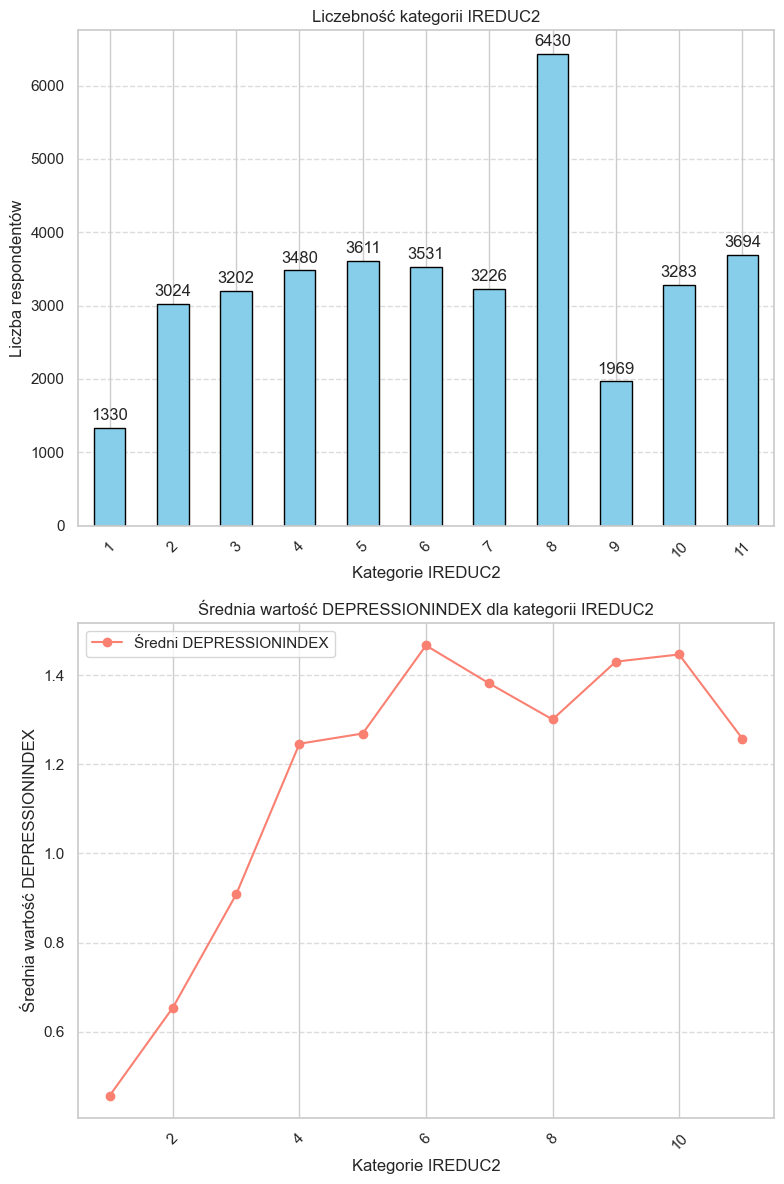

In [1045]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ired_counts = data['IREDUC2'].value_counts().sort_index()

depression_mean = data.groupby('IREDUC2')['DEPRESSIONINDEX'].mean().sort_index()


plt.figure(figsize=(8,12))

plt.subplot(2, 1, 1) 
ired_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Liczebność kategorii IREDUC2')
plt.xlabel('Kategorie IREDUC2')
plt.ylabel('Liczba respondentów')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(ired_counts.values):
    plt.text(index, value + max(ired_counts.values)*0.01, str(value), ha='center', va='bottom')


plt.subplot(2, 1, 2) 
plt.plot(depression_mean.index, depression_mean.values, marker='o', linestyle='-', color='salmon', label='Średni DEPRESSIONINDEX')
plt.title('Średnia wartość DEPRESSIONINDEX dla kategorii IREDUC2')
plt.xlabel('Kategorie IREDUC2')
plt.ylabel('Średnia wartość DEPRESSIONINDEX')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



Wskaźnik depresji początkowo rośnie, osiągając najwyższą wartość dla poziomu wykształcenia "Sophomore/14th year or Junior/15th year" (1.446), a następnie spada dla najwyższych poziomów edukacji (1.257). Wyniki sugerują, że poziom wykształcenia ma istotny, ale nieliniowy wpływ na poziom depresji, 

In [1046]:
final_cols.append('IREDUC2')

In [1047]:
# # Edukacja - EDU_DUMMY 0: HS (szkola średnia) lub niżej, 1: ponad HS
data[['IREDUC2', 'EDU_DUMMY']].corr()

,IREDUC2,EDU_DUMMY
IREDUC2,1.0000,0.7365
EDU_DUMMY,0.7365,1.0000



Ze względu na wysoką korelację między zmiennymi IREDUC2 i EDU_DUMMY (r = 0.736), uwzględnienie obu w analizie może prowadzić do redundancji.

Analiza związana z czynnikami ekonomicznymi. Poniższa analiza pokazuje, że średni wskaźnik depresji (MeanDepressionIndex) maleje wraz ze wzrostem poziomu dochodów (INCOME).


Średni wskaźnik depresji dla każdej grupy INCOME:
   INCOME  MeanDepressionIndex
0       1               1.3413
1       2               1.2378
2       3               1.1403
3       4               1.1029


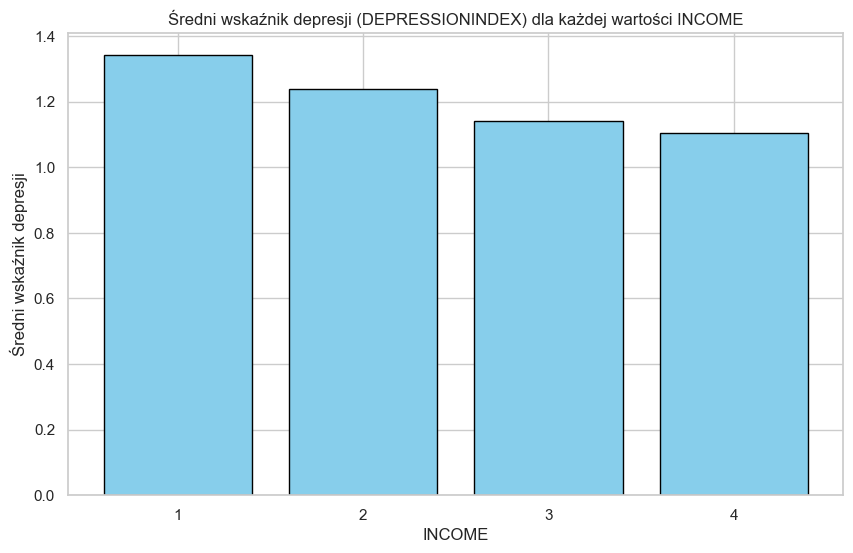

In [1048]:
data['INCOME'].value_counts() 

inc_depression = data.groupby('INCOME')['DEPRESSIONINDEX'].mean().reset_index()
inc_depression.columns = ['INCOME', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy INCOME:")
print(inc_depression)


plt.figure(figsize=(10, 6))
plt.bar(inc_depression['INCOME'], inc_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości INCOME')
plt.xlabel('INCOME')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(inc_depression['INCOME'])
plt.show()

In [1049]:

final_cols.append('INCOME')

In [1050]:
#Korelacja między INCOME a INCOME_R (dochód własny)
data[['INCOME', 'INCOME_R']].corr()

,INCOME,INCOME_R
INCOME,1.0000,0.2588
INCOME_R,0.2588,1.0000


Niska korelacja (r = 0.258) między zmiennymi INCOME i INCOME_R wskazuje, że reprezentują różne aspekty sytuacji finansowej i mogą być rozpatrywane niezależnie w analizie.

In [1051]:

data['INCOME_R'].value_counts()

1    24927
2     4402
3     2806
4     1716
6     1129
5     1069
7      731
Name: INCOME_R, dtype: int64

In [1052]:
inc_depression = data.groupby('INCOME_R')['DEPRESSIONINDEX'].mean().reset_index()
inc_depression.columns = ['INCOME_R', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy INCOME_R:")
print(inc_depression)


Średni wskaźnik depresji dla każdej grupy INCOME_R:
   INCOME_R  MeanDepressionIndex
0         1               1.1969
1         2               1.3982
2         3               1.2819
3         4               1.1416
4         5               1.0664
5         6               1.0301
6         7               1.0465


Najwyższy wskaźnik depresji zaobserwowano w grupie o indywidualnych dochodach 10,000-19,999 (1.397), natomiast najniższy w grupie o dochodach 50,000-74,999 (1.030). Wyniki sugerują, że niższy poziom dochodów może być związany z wyższym wskaźnikiem depresji, jednak w grupie o najniższych dochodach (< 10,000) wskaźnik depresji jest nieco niższy (1.194), co wskazuje na nieliniową zależność.

 Dalsza analiza obejmuje zmienne POVERTY rozumiane jako dochód względem poziomu biedy oraz zmiennej związanej z posiadaniem prywatnego ubezpieczenia  zdrowotnego.


Średni wskaźnik depresji dla każdej grupy POVERTY:
   POVERTY  MeanDepressionIndex
0        1               1.3168
1        2               1.2371
2        3               1.1734


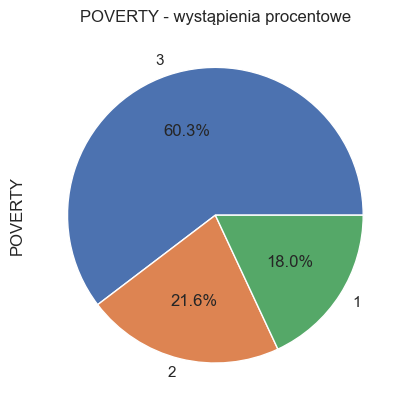

In [1053]:
data['POVERTY'].value_counts().plot(kind='pie', autopct='%1.1f%%') 
plt.title('POVERTY - wystąpienia procentowe')

feature_depression = data.groupby('POVERTY')['DEPRESSIONINDEX'].mean().reset_index()
feature_depression.columns = ['POVERTY', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy POVERTY:")
print(feature_depression)

In [1054]:

final_cols.append('POVERTY')


Średni wskaźnik depresji dla każdej grupy IRPRVHLT:
   IRPRVHLT  MeanDepressionIndex
0         0               1.3339
1         1               1.1526


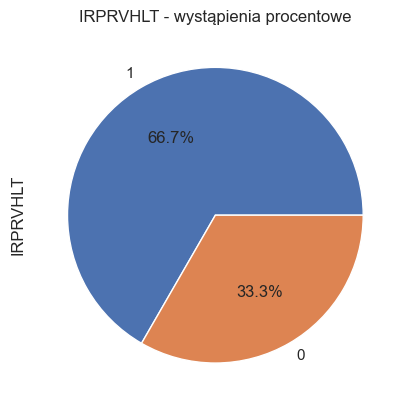

In [1055]:
data['IRPRVHLT'] = data['IRPRVHLT'].replace({2: 0})
data['IRPRVHLT'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('IRPRVHLT - wystąpienia procentowe')

feature_depression = data.groupby('IRPRVHLT')['DEPRESSIONINDEX'].mean().reset_index()
feature_depression.columns = ['IRPRVHLT', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy IRPRVHLT:")
print(feature_depression)

In [1056]:
# w grupie bez ubezpiecznia wskaźnik depresji jest wyższy
final_cols.append('IRPRVHLT')

W dalszym etapie analizy w celu oceny wpływu zatrudnienia na poziom depresji zdefiniowano funkcję employment_status przekształcają wartości w kolumnie EMPSTAT4 na nową kategorię EMPLOYMENT_BIN, przypisując wartość 1 dla osób zatrudnionych na pełen lub część etatu, wartość 0 dla osób bez zatrudnienia lub posiadających inne formy zatrudnienia, wartość 2 dla dzieci. 

Na podstawie analizy średnich wartości wskaźnika depresji (DEPRESSIONINDEX) dla zmiennej EMPLOYMENT_BIN można zauważyć, że osoby niepracujące lub posiadające inne formy zatrudnienia wykazują nieco wyższy wskaźnik depresji w porównaniu do osób zatrudnionych na pełen etat. WS

In [1057]:

def employment_status(value):
    if value in [1, 2]:  # Pełen etat, część etatu
        return 1
    elif value in [3, 4]:  # Brak zatrudnienia, inne
        return 0
    elif value == 99:  # Dzieci
        return 2
    else:  
        return None

data['EMPLOYMENT_BIN'] = data['EMPSTAT4'].apply(employment_status)
print("Rozkład dla zmiennej EMPLOYMENT_BIN:")
print(data['EMPLOYMENT_BIN'].value_counts(dropna=False))

emp_depression = data.groupby('EMPLOYMENT_BIN')['DEPRESSIONINDEX'].mean().reset_index()
emp_depression.columns = ['EMPLOYMENT_BIN', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy EMPLOYMENT_BIN:")
print(emp_depression)



Rozkład dla zmiennej EMPLOYMENT_BIN:
2    18133
1    13325
0     5322
Name: EMPLOYMENT_BIN, dtype: int64

Średni wskaźnik depresji dla każdej grupy EMPLOYMENT_BIN:
   EMPLOYMENT_BIN  MeanDepressionIndex
0               0               1.3407
1               1               1.2963
2               2               1.1144


In [1058]:

final_cols.append('EMPLOYMENT_BIN')

Kolejna analiza dotyczy warunków zamieszkania, gdzie kolumna REVERSEPOP wskazuje wielkość miejsca zamieszkania: 1 – małe miasto, 2 – miasto poniżej miliona mieszkańców, 3 – miasto z populacją miliona lub więcej.


Średni wskaźnik depresji dla każdej grupy REVERSEPOP:
   REVERSEPOP  MeanDepressionIndex
0           1               1.2102
1           2               1.2560
2           3               1.1721


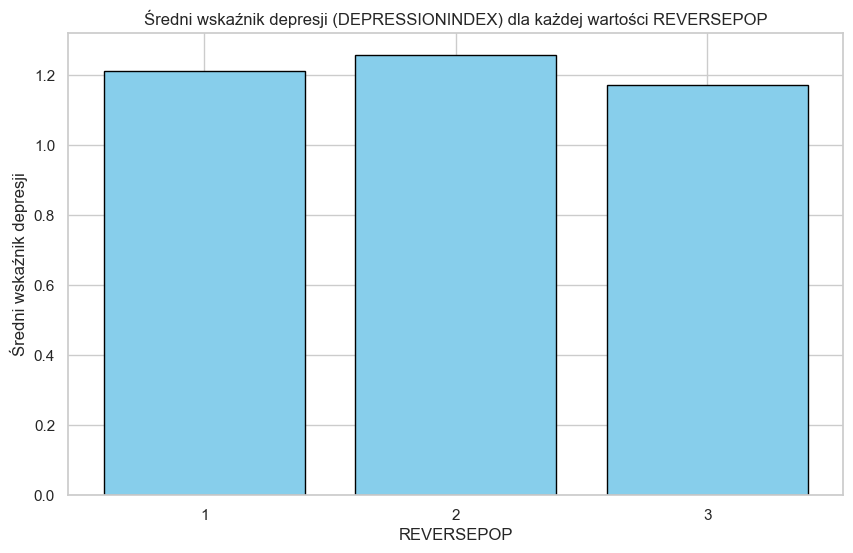

In [1059]:

data['REVERSEPOP'].value_counts()
rev_depression = data.groupby('REVERSEPOP')['DEPRESSIONINDEX'].mean().reset_index()
rev_depression.columns = ['REVERSEPOP', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy REVERSEPOP:")
print(rev_depression)
plt.figure(figsize=(10, 6))
plt.bar(rev_depression['REVERSEPOP'], rev_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości REVERSEPOP')
plt.xlabel('REVERSEPOP')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(rev_depression['REVERSEPOP'])
plt.show()



Wyniki sugerują, że poziom depresji jest nieco wyższy w miastach powyżej 1 mln mieszkańców, jednak różnice są stosunkowo niewielkie.

Następnie przeanalizowano dane z MOVESPY2 czyli liczby przeprowadzek w okresie ostatnich 12 miesięcy. Dane oznaczają:
0 - Brak, 1 - Jedna, 2 - Dwie, 3 - Trzy lub więcej. 994, 997, 998 - Nie wiadomo. Zamieniamy na 3 ( można założyć, że osoby ktore odmawiają podania prawodpodobnie przeprowadzają się często)


Średni wskaźnik depresji dla każdej grupy MOVESPY2:
   MOVESPY2  MeanDepressionIndex
0         0               1.1181
1         1               1.3472
2         2               1.4412
3         3               1.7675


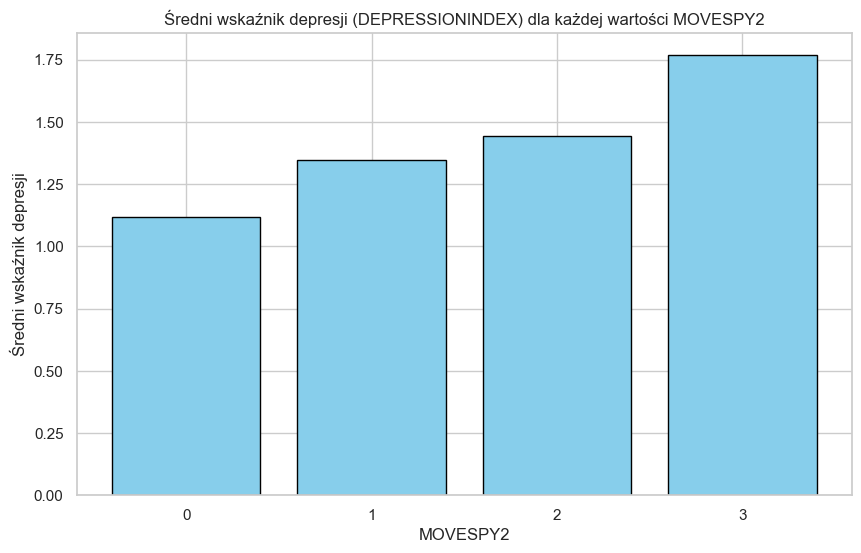

In [1060]:
data['MOVESPY2'].value_counts()
data['MOVESPY2']=  data['MOVESPY2'].replace({994: 3, 998:3, 997:3})

feature_depression = data.groupby('MOVESPY2')['DEPRESSIONINDEX'].mean().reset_index()
feature_depression.columns = ['MOVESPY2', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy MOVESPY2:")
print(feature_depression)

plt.figure(figsize=(10, 6))
plt.bar(feature_depression['MOVESPY2'], feature_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości MOVESPY2')
plt.xlabel('MOVESPY2')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(feature_depression['MOVESPY2'])
plt.show()

Wyniki sugerują, że częste zmiany miejsca zamieszkania mogą być istotnym czynnikiem wpływającym na wyższy poziom depresji.
 
Dalsza analiza koncentruje się na wpływie typów mieszkań (zmienna CACHAR) na wskaźnik depresji.

W zmiennej CACHAR dokonano uproszczenia i konsolidacji kategorii w celu ułatwienia analizy. Różne typy apartamentów (kategorie 7, 8, 9) zostały połączone w jedną grupę "Apartament", a mieszkania grupowe (kategorie 3 i 4) w grupę "Outside".

In [1061]:

final_cols.append('MOVESPY2')

Dalsza analiza dotyczy wpływu typów mieszkania, które zostały podzielone na 9 kategorii. Warto sprawdzić, czy różne typy mieszkań mogą mieć wpływ na wskaźnik depresji.


Średni wskaźnik depresji dla każdej grupy CACHAR:
       CACHAR  MeanDepressionIndex
0  Apartament               1.3120
1    Military               1.3929
2     Outside               1.0711
3      Senior               1.6545
4  SingleUnit               1.1828
5     Student               1.3393


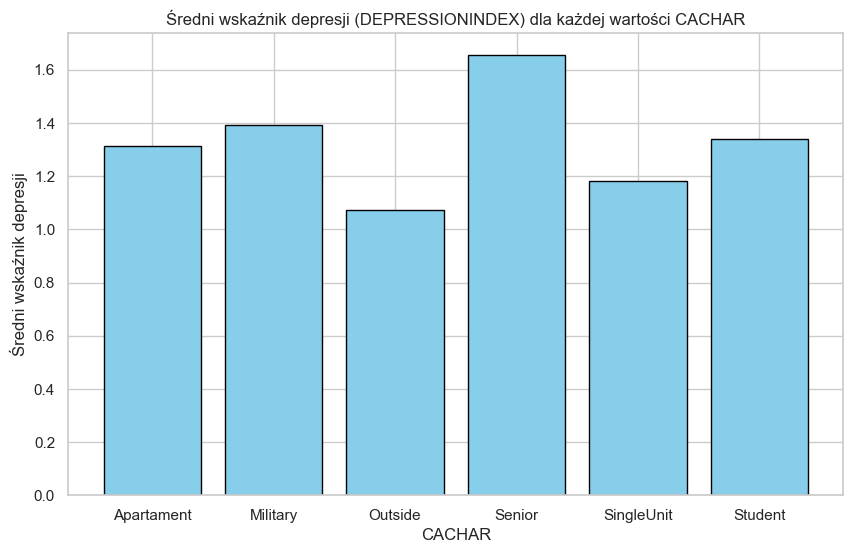

In [1062]:
data['CACHAR'].value_counts()
data['CACHAR'] = data['CACHAR'].replace({1 : "Military", 2:"Student", 3:"Outside", 4:"Outside", 5:"Senior", 6:"SingleUnit", 7:"Apartament", 8:"Apartament", 9:"Apartament", -9:"SingleUnit"})

feature_depression = data.groupby('CACHAR')['DEPRESSIONINDEX'].mean().reset_index()
feature_depression.columns = ['CACHAR', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy CACHAR:")
print(feature_depression)

plt.figure(figsize=(10, 6))
plt.bar(feature_depression['CACHAR'], feature_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości CACHAR')
plt.xlabel('CACHAR')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(feature_depression['CACHAR'])
plt.show()

Najwyższy wskaźnik depresji zaobserwowano w grupie mieszkańców Senior Housing/Assisted Living (1.655), a także na terenach wojskowych (Military, 1.393), co wskazuje na potencjalny wpływ specyficznych warunków życia na zdrowie psychiczne.

In [1063]:
#Cecha ta, ze względu na swoją istotność statystyczną, zostanie zakodowana za pomocą metody one-hot encoding,
#final_cols.append('CACHAR')

In [1064]:
data['CATYPE'].value_counts()
feature_depression = data.groupby('CATYPE')['DEPRESSIONINDEX'].mean().reset_index()
feature_depression.columns = ['CATYPE', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy CATYPE:")
print(feature_depression)


Średni wskaźnik depresji dla każdej grupy CATYPE:
   CATYPE  MeanDepressionIndex
0      -9               0.7654
1       1               1.2099
2       2               1.2139
3       3               1.2448
4       4               1.3382
5       5               1.2083
6       6               1.0922


Typ kontroli dostępu (CATYPE) charakteryzuje się znacznym niezbalansowaniem między grupami, z dominującą kategorią "None" (86% przypadków) oraz marginalną grupą "Other" (0.4%) o niskim wskaźniku depresji (1.092). Niezbalansowanie i trudności w interpretacji wyników związane z grupą "Other" stanowią podstawę do wykluczenia tej cechy z dalszej analizy.

Dalsza analiza związana będzie z historią przestępczości i jej potencjalnym wpływem na depresję wsród badanych.


Średni wskaźnik depresji dla każdej grupy CRIMEHIST:
   CRIMEHIST  MeanDepressionIndex
0          0               1.1493
1          1               1.5904


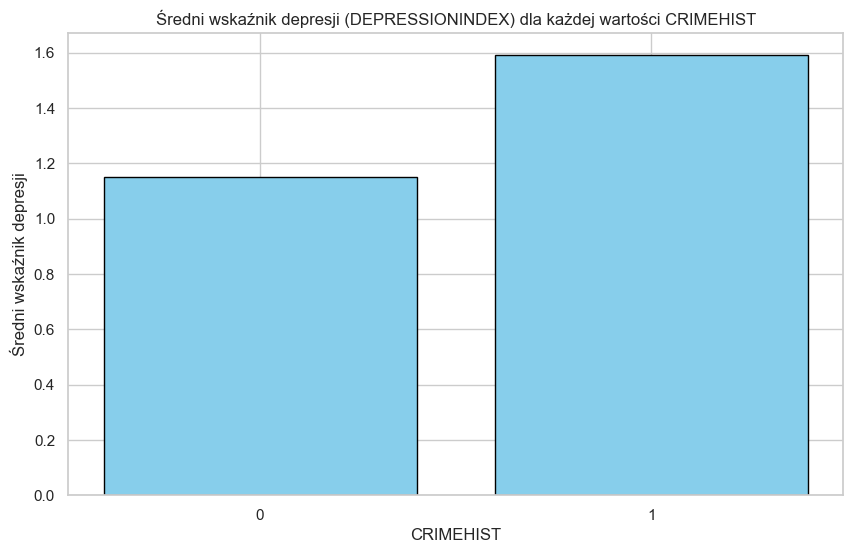

In [1065]:
data['CRIMEHIST'] = data['CRIMEHIST'].replace({-1: 1})
data['CRIMEHIST'].value_counts() 
crime_depression = data.groupby('CRIMEHIST')['DEPRESSIONINDEX'].mean().reset_index()
crime_depression.columns = ['CRIMEHIST', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy CRIMEHIST:")
print(crime_depression)

plt.figure(figsize=(10, 6))
plt.bar(crime_depression['CRIMEHIST'], crime_depression['MeanDepressionIndex'], color='skyblue', edgecolor='black')
plt.title('Średni wskaźnik depresji (DEPRESSIONINDEX) dla każdej wartości CRIMEHIST')
plt.xlabel('CRIMEHIST')
plt.ylabel('Średni wskaźnik depresji')
plt.xticks(crime_depression['CRIMEHIST'])
plt.show()

Analiza wykazała, że osoby z historią kryminalną mają wyższy średni wskaźnik depresji (1.585) w porównaniu do osób bez takiej historii (1.148). Wyniki sugerują, że przeszłość kryminalna może być istotnym czynnikiem związanym z wyższym poziomem depresji. Dalsza analiza obejmuje kolejne zmienne związane z przestępstwami

In [1066]:
final_cols.append('ANYCRIME')
final_cols.append('CRIMEHIST')

In [1067]:
data['ANYSDRUG'] = data['ANYSDRUG'].replace({-1: 1})
data['ANYATTACK'] = data['ANYATTACK'].replace({-1: 1})
data['ANYTHEFT'] = data['ANYTHEFT'].replace({-1: 1})

# NUMARREST  - liczba aresztowań w  minionym roku, gdzie 0 oznacza brak, 1, 2, 3 - trzy lub więcej, -9 brak informacji.
data['NUMARREST'] = data['NUMARREST'].replace({-9: 3})

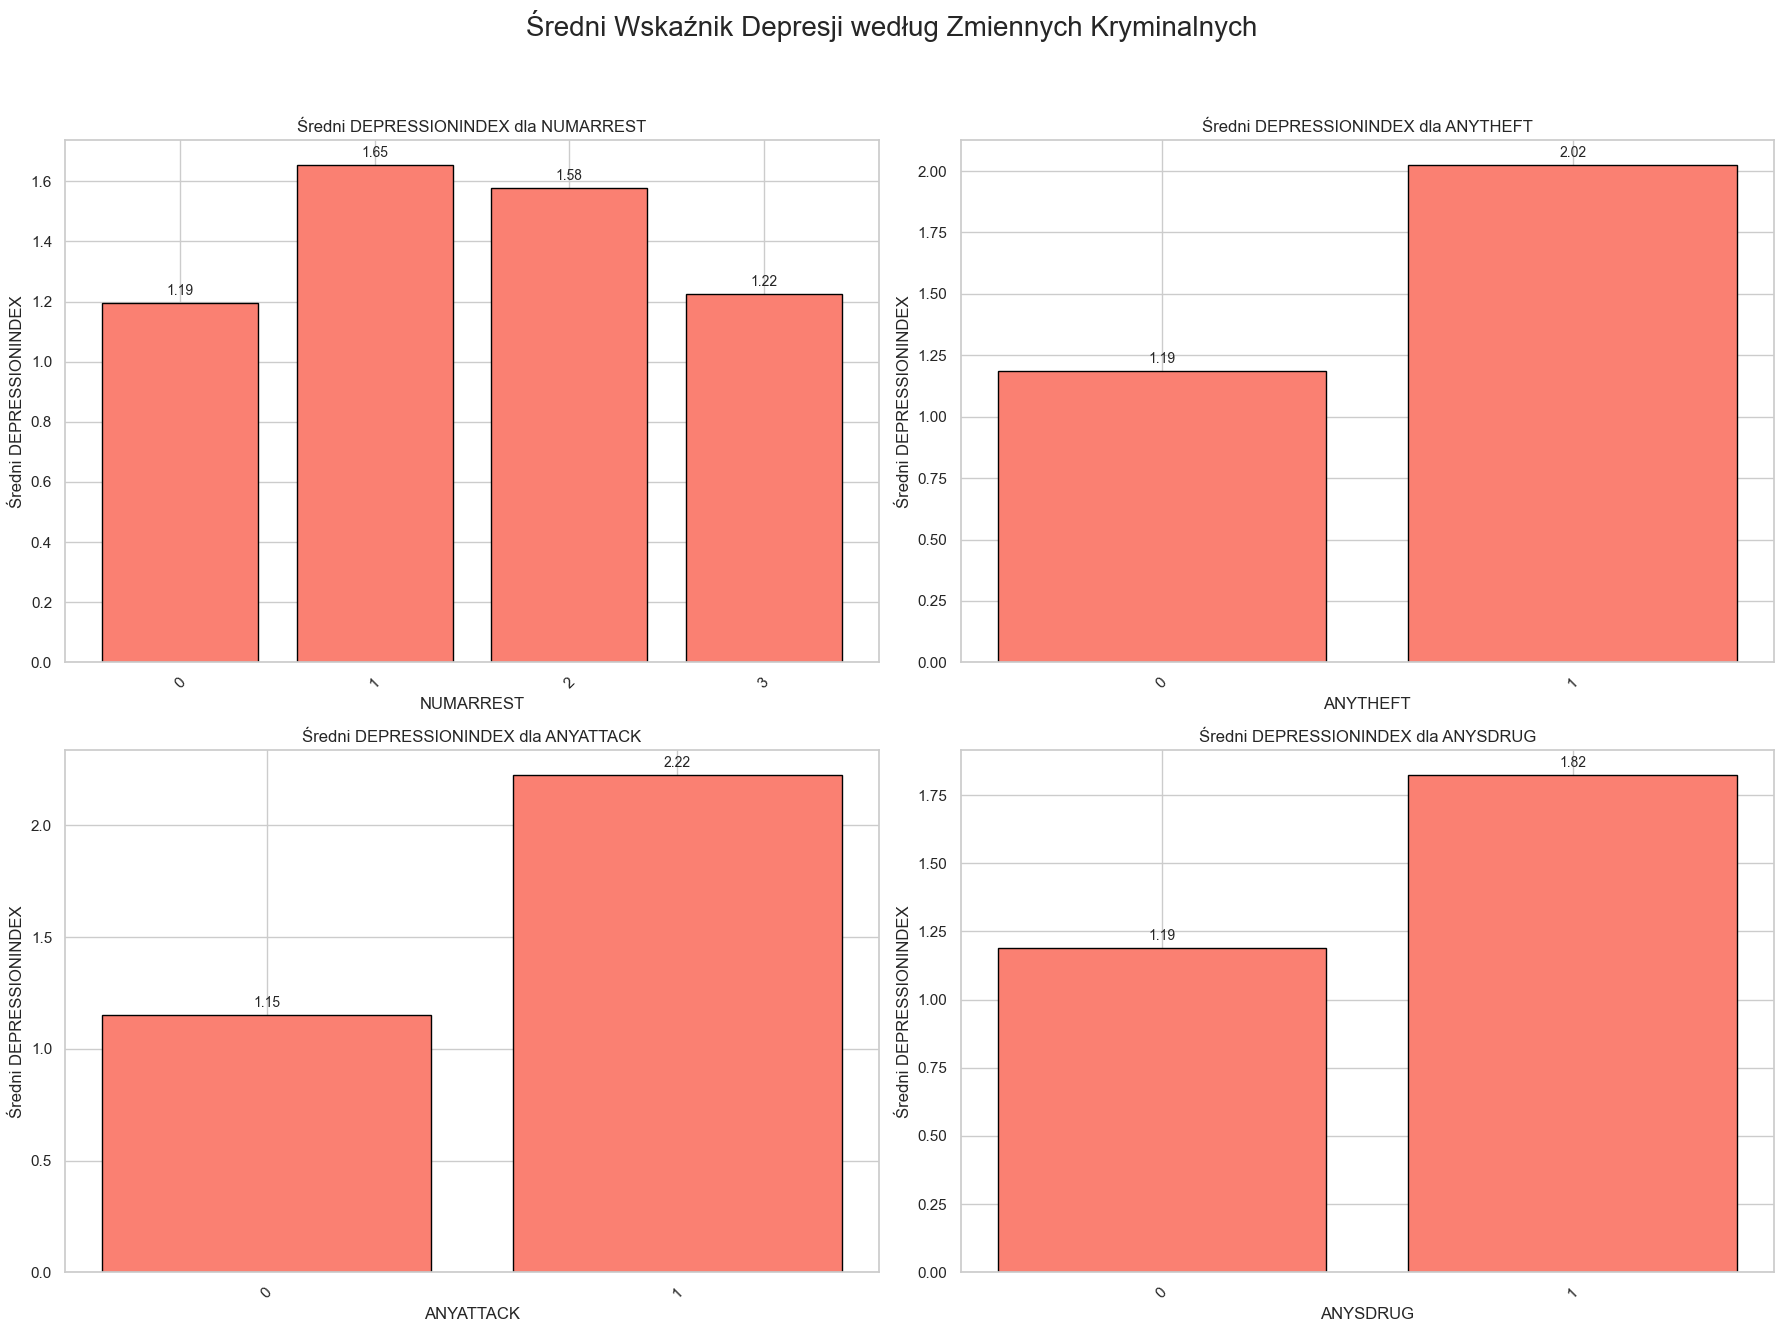

In [1068]:
def calculate_mean_depression(df, group_var):
    feature_depression = df.groupby(group_var)['DEPRESSIONINDEX'].mean().reset_index()
    feature_depression.columns = [group_var, 'MeanDepressionIndex']
    return feature_depression


mean_depression_numarrest = calculate_mean_depression(data, 'NUMARREST')
mean_depression_anytheft = calculate_mean_depression(data, 'ANYTHEFT')
mean_depression_anyattack = calculate_mean_depression(data, 'ANYATTACK')
mean_depression_anysdrug = calculate_mean_depression(data, 'ANYSDRUG')


fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Średni Wskaźnik Depresji według Zmiennych Kryminalnych', fontsize=20)

features = [
    ('NUMARREST', mean_depression_numarrest, axes[0, 0]),
    ('ANYTHEFT', mean_depression_anytheft, axes[0, 1]),
    ('ANYATTACK', mean_depression_anyattack, axes[1, 0]),
    ('ANYSDRUG', mean_depression_anysdrug, axes[1, 1])
]


for feature_name, df_feature, ax in features:
    ax.bar(df_feature[feature_name].astype(str), df_feature['MeanDepressionIndex'], color='salmon', edgecolor='black')
    ax.set_title(f'Średni DEPRESSIONINDEX dla {feature_name}')
    ax.set_xlabel(feature_name)
    ax.set_ylabel('Średni DEPRESSIONINDEX')
    ax.tick_params(axis='x', rotation=45)
    

    for idx, row in df_feature.iterrows():
        ax.text(
            idx, 
            row['MeanDepressionIndex'] + df_feature['MeanDepressionIndex'].max()*0.01, 
            f"{row['MeanDepressionIndex']:.2f}", 
            ha='center', 
            va='bottom',
            fontsize=10
        )


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid('False')
plt.show()

In [1069]:
data[['NUMARREST','CRIMEHIST', 'ANYSDRUG', 'ANYATTACK', 'ANYCRIME']].corr()

,NUMARREST,CRIMEHIST,ANYSDRUG,ANYATTACK,ANYCRIME
NUMARREST,1.0000,0.5597,0.1826,0.1801,0.2022
CRIMEHIST,0.5597,1.0000,0.1762,0.1257,0.1779
ANYSDRUG,0.1826,0.1762,1.0000,0.2374,0.5467
ANYATTACK,0.1801,0.1257,0.2374,1.0000,0.7103
ANYCRIME,0.2022,0.1779,0.5467,0.7103,1.0000


Analiza korelacji wykazała silny związek między NUMARREST a CRIMEHIST (r = 0.56), a także wysokie korelacje ANYSDRUG (r = 0.592) i ANYATTACK (r = 0.751) z ANYCRIME. W celu uniknięcia problemów z kolinearnością zaleca się wykluczenie jednej z powiązanych zmiennych w każdej z tych par. Pozostałe zmienne charakteryzują się niskimi korelacjami i mogą być efektywnie wykorzystane jako niezależne predyktory w modelu.

In [1070]:
# Binaryzacja zmiennej HEALTH2
def binary_health(value):
    if value in [1, 2, 3]:  # Zdrowy
        return 1
    elif value in [4, -9]:  # Chory
        return 0
    else: 
        return None


data['HEALTH_BIN'] = data['HEALTH2'].apply(binary_health)
print("Rozkład HEALTH_BIN:")
print(data['HEALTH_BIN'].value_counts(dropna=False))


health_depression = data.groupby('HEALTH_BIN')['DEPRESSIONINDEX'].mean().reset_index()
health_depression.columns = ['HEALTH_BIN', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy HEALTH_BIN:")
print(health_depression)

Rozkład HEALTH_BIN:
1    34480
0     2300
Name: HEALTH_BIN, dtype: int64

Średni wskaźnik depresji dla każdej grupy HEALTH_BIN:
   HEALTH_BIN  MeanDepressionIndex
0           0               1.9983
1           1               1.1606



Zmienna HEALTH_BIN wykazuje wyraźną różnicę w średnim wskaźniku depresji między grupami, co sugeruje potencjalny związek między stanem zdrowia a depresją. Jednak HEALTH_BIN jest uproszczonym binarnym podziałem, który może nie w pełni odzwierciedlać rzeczywiste zróżnicowanie stanu zdrowia, co może prowadzić do utraty istotnych informacji.

In [1071]:

final_cols.append('HEALTH_BIN')

Następnie skupiono się na zmiennej reprezentujacej liczbę dni, w których uczniowie opuścili szkołę z powodu choroby.
Przedziały zostały zakodowane numerycznie w następujący sposób:
- **0**: Brak nieobecności
- **1**: 1-7 dni nieobecności
- **2**: 8-14 dni nieobecności
- **3**: Powyżej 14 dni nieobecności

In [1072]:

def categorize_days(days):
    if days == 0:
        return 0
    elif 0 < days <= 7:
        return 1
    elif 7 < days <= 14:
        return 2
    else:
        return 3


data['SCHDSKIP'] = data['SCHDSKIP'].apply(categorize_days)
feature_depression = data.groupby('SCHDSKIP')['DEPRESSIONINDEX'].mean().reset_index()
feature_depression.columns = ['SCHDSKIP', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy SCHDSKIP:")
print(feature_depression)


Średni wskaźnik depresji dla każdej grupy SCHDSKIP:
   SCHDSKIP  MeanDepressionIndex
0         0               1.0495
1         1               1.6460
2         2               1.7253
3         3               1.2828



Analiza wskazuje, że średni wskaźnik depresji wzrasta wraz ze wzrostem liczby opuszczonych dni w szkole z powodu choroby (SCHDSKIP). Najniższy wskaźnik depresji odnotowano w grupie uczniów, którzy nie opuścili żadnego dnia (0, M = 1.047), a najwyższy w grupie opuszczającej od 7 do 14 dni (2, M = 1.725)

In [1073]:
data[['YOWRSATP', 'YOWRSPLN', 'ADWRDLOT', 'ADWRSTHK', 'DEPRESSIONINDEX']].corr()


C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\2738835538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[['YOWRSATP', 'YOWRSPLN', 'ADWRDLOT', 'ADWRSTHK', 'DEPRESSIONINDEX']].corr()


,YOWRSATP,YOWRSPLN,ADWRDLOT,ADWRSTHK
YOWRSATP,1.0000,0.9972,-0.0651,-0.0650
YOWRSPLN,0.9972,1.0000,-0.0652,-0.0652
ADWRDLOT,-0.0651,-0.0652,1.0000,0.9987
ADWRSTHK,-0.0650,-0.0652,0.9987,1.0000


Analiza korelacji wskazuje, że kolumny dotyczące myśli samobójczych są wyraźnie skorelowane w parach: YOWRSATP z YOWRSPLN oraz ADWRDLOT z ADWRSTHK.  W dalszej analizie warto rozważyć uwzględnienie tylko jednej zmiennej z każdej pary lub zastosowanie metody redukcji wymiarów, aby uniknąć problemów z nadmierną współzależnością danych.

Rozkład MARITAL_BIN:
Never_Married    18356
Under14           9072
Married           7223
Divorced          1693
Widowed            436
Name: MARITAL_BIN, dtype: int64

Średni wskaźnik depresji dla każdej grupy MARITAL_BIN:
     MARITAL_BIN  MeanDepressionIndex
0       Divorced               2.1364
1        Married               1.0698
2  Never_Married               1.3718
3        Under14               0.8321
4        Widowed               1.2431


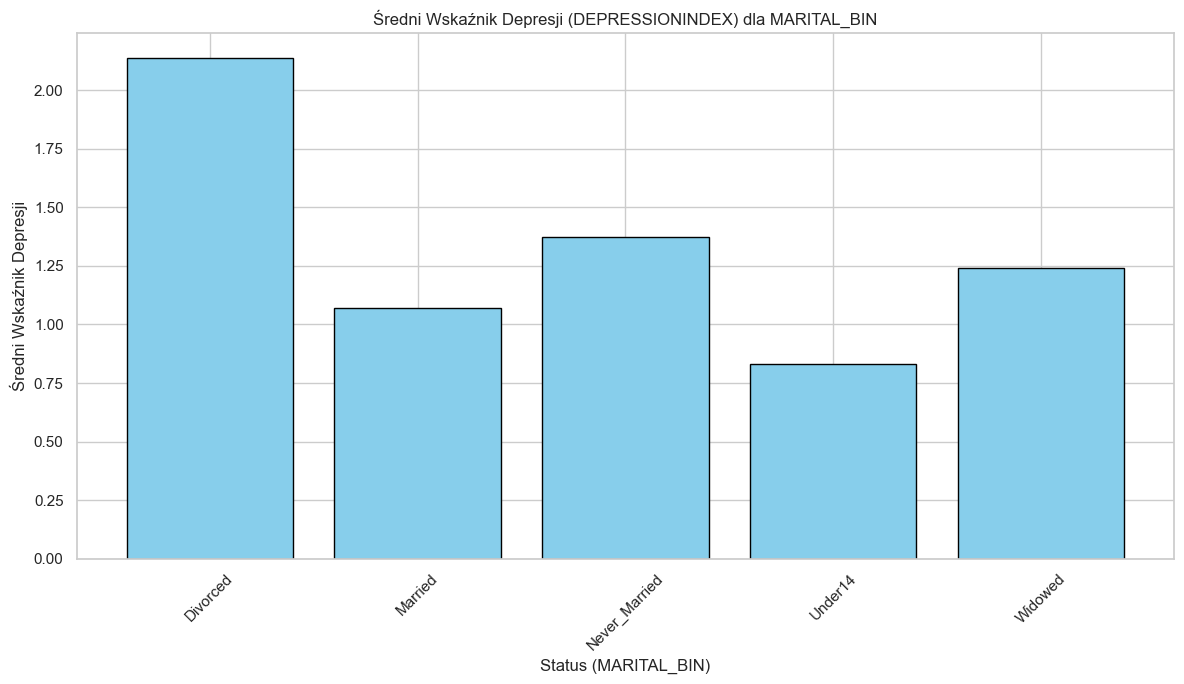

In [1074]:
import pandas as pd
import matplotlib.pyplot as plt


def marital_status(value):
    if value == 1:
        return 'Married'
    elif value == 2:
        return 'Widowed'
    elif value == 3:
        return 'Divorced'
    elif value == 4:
        return 'Never_Married'
    elif value == 99:
        return 'Under14'
    else:
        return 'Unknown'

data['MARITAL_BIN'] = data['IRMARIT'].apply(marital_status)


print("Rozkład MARITAL_BIN:")
print(data['MARITAL_BIN'].value_counts(dropna=False))

mar_depression = data.groupby('MARITAL_BIN')['DEPRESSIONINDEX'].mean().reset_index()
mar_depression.columns = ['MARITAL_BIN', 'MeanDepressionIndex']
print("\nŚredni wskaźnik depresji dla każdej grupy MARITAL_BIN:")
print(mar_depression)

plt.figure(figsize=(12, 7))
bars = plt.bar(mar_depression['MARITAL_BIN'], mar_depression['MeanDepressionIndex'], 
               color='skyblue', edgecolor='black')


plt.title('Średni Wskaźnik Depresji (DEPRESSIONINDEX) dla MARITAL_BIN')
plt.xlabel('Status (MARITAL_BIN)')
plt.ylabel('Średni Wskaźnik Depresji')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analiza zmiennej MARITAL_BIN pokazuje, że najwyższy wskaźnik depresji występuje u osób niebędących w związku małżeńskim (M = 1.371), a najniższy u dzieci (M = 0.830). Osoby będące w związku małżeńskim osiągają średni wskaźnik depresji na poziomie 1.270, co wskazuje na związek stanu cywilnego z poziomem depresji.

In [1075]:
final_cols.append('MARITAL_BIN')

In [1076]:

final_cols

['CATAG7',
 'IRSEX',
 'NEWRACE2',
 'ANYINDEX',
 'DPILLALC',
 'ANYILLICITRC',
 'MJCOKELY',
 'COCCRKLY',
 'ANYGT12MO',
 'ANLEVER',
 'IREDUC2',
 'INCOME',
 'POVERTY',
 'IRPRVHLT',
 'EMPLOYMENT_BIN',
 'MOVESPY2',
 'ANYCRIME',
 'CRIMEHIST',
 'HEALTH_BIN',
 'MARITAL_BIN']

In [1077]:
final_cols_with_target = final_cols+['DEPRESSIONINDEX']

In [1078]:
final_df = data[final_cols_with_target]

Przeprowadzono analizę statystyczną mającą na celu wyłonienie cech (kolumn) w zbiorze danych final_df, które są istotnie różne od siebie pod względem średnich wartości. Wykorzystano w tym celu test permutacyjny,  test Mann-Whitney U oraz test Kolmogorova-Smirnova (KS), należy zmniejszyć wartość n_resamples ze względu na czas wykonywania.

In [1079]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import permutation_test, mannwhitneyu, ks_2samp


ALPHA = 0.05
RESAMPLES = 123
SEED = 42


def mean_diff(x, y):
    return np.mean(x) - np.mean(y)

def perm_pval(x, y, res, seed):
    result = permutation_test(
        data=(x, y),
        statistic=mean_diff,
        alternative='two-sided',
        n_resamples=res,
        random_state=seed
    )
    return result.pvalue

def mw_pval(x, y):
    _, p = mannwhitneyu(x, y, alternative='two-sided')
    return p

def ks_pval(x, y):
    _, p = ks_2samp(x, y)
    return p

cols = [
    'CATAG7', 'IRSEX', 'NEWRACE2', 'ANYINDEX', 'DPILLALC',
    'ANYILLICITRC', 'MJCOKELY', 'COCCRKLY', 'ANYGT12MO', 'ANLEVER',
    'IREDUC2', 'INCOME', 'POVERTY', 'IRPRVHLT', 'EMPLOYMENT_BIN',
    'MOVESPY2', 'ANYCRIME', 'CRIMEHIST', 'HEALTH_BIN', 'MARITAL_BIN'
]

avail_cols = [c for c in cols if c in final_df.columns]
missing_cols = [c for c in cols if c not in final_df.columns]

if missing_cols:
    for c in missing_cols:
        print(f" - {c}")

selected = []
results = []

print("\n Analiza Istotności Wybranych Czynników \n")
print(f"Próg istotności: {ALPHA}\n")


for col in tqdm(avail_cols, desc="Analiza czynników"):
    if not selected:
        selected.append(col)
        continue

    unique = True
    data1 = final_df[col].dropna().values

    for sel in selected:
        data2 = final_df[sel].dropna().values

        if len(data2) == 0 or len(data1) == 0:
            unique = False
            break

        try:
            p_perm = perm_pval(data1, data2, RESAMPLES, SEED)
            p_mw = mw_pval(data1, data2)
            p_ks = ks_pval(data1, data2)
        except Exception as e:
            print(f"Błąd  {col} i {sel}: {e}")
            unique = False
            break

        results.append({
            'Kolumna': col,
            'Porównanie z ': sel,
            'p_perm': p_perm,
            'p_mw': p_mw,
            'p_ks': p_ks
        })


        if p_perm >= ALPHA and p_mw >= ALPHA and p_ks >= ALPHA:
            print(f"Brak istotnych różnic między {col} a {sel} "
                  f"(p_perm={p_perm:.4f}, p_mw={p_mw:.4f}, p_ks={p_ks:.4f}).")
            unique = False
            break

    if unique:
        selected.append(col)
        print(f"Kolumna '{col}' jest istotnie różna od pozostałych "
              f"(p_perm < {ALPHA}, p_mw < {ALPHA}, p_ks < {ALPHA}).\n")


print(f"Poziom istotności: {ALPHA}")
print("Lista czynników, które zostały uznane za istotnie różne:")
for c in selected:
    print(f" - {c}")




 Analiza Istotności Wybranych Czynników 

Próg istotności: 0.05



Analiza czynników:  10%|█         | 2/20 [00:00<00:08,  2.21it/s]

Kolumna 'IRSEX' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  15%|█▌        | 3/20 [00:02<00:17,  1.04s/it]

Kolumna 'NEWRACE2' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  20%|██        | 4/20 [00:05<00:26,  1.64s/it]

Kolumna 'ANYINDEX' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  25%|██▌       | 5/20 [00:08<00:34,  2.28s/it]

Kolumna 'DPILLALC' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  30%|███       | 6/20 [00:13<00:42,  3.01s/it]

Kolumna 'ANYILLICITRC' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  35%|███▌      | 7/20 [00:18<00:49,  3.79s/it]

Kolumna 'MJCOKELY' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  40%|████      | 8/20 [00:25<00:55,  4.64s/it]

Kolumna 'COCCRKLY' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  45%|████▌     | 9/20 [00:32<00:59,  5.41s/it]

Kolumna 'ANYGT12MO' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  50%|█████     | 10/20 [00:40<01:02,  6.30s/it]

Kolumna 'ANLEVER' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  55%|█████▌    | 11/20 [00:49<01:02,  6.99s/it]

Kolumna 'IREDUC2' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  60%|██████    | 12/20 [00:58<01:01,  7.66s/it]

Kolumna 'INCOME' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  65%|██████▌   | 13/20 [01:08<00:58,  8.35s/it]

Kolumna 'POVERTY' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  70%|███████   | 14/20 [01:19<00:54,  9.07s/it]

Kolumna 'IRPRVHLT' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  75%|███████▌  | 15/20 [01:30<00:49,  9.83s/it]

Kolumna 'EMPLOYMENT_BIN' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  80%|████████  | 16/20 [01:43<00:42, 10.68s/it]

Kolumna 'MOVESPY2' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  85%|████████▌ | 17/20 [01:57<00:34, 11.56s/it]

Kolumna 'ANYCRIME' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  90%|█████████ | 18/20 [02:11<00:24, 12.43s/it]

Kolumna 'CRIMEHIST' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników:  95%|█████████▌| 19/20 [02:26<00:13, 13.36s/it]

Kolumna 'HEALTH_BIN' jest istotnie różna od pozostałych (p_perm < 0.05, p_mw < 0.05, p_ks < 0.05).



Analiza czynników: 100%|██████████| 20/20 [02:27<00:00,  7.40s/it]

Błąd  MARITAL_BIN i CATAG7: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Poziom istotności: 0.05
Lista czynników, które zostały uznane za istotnie różne:
 - CATAG7
 - IRSEX
 - NEWRACE2
 - ANYINDEX
 - DPILLALC
 - ANYILLICITRC
 - MJCOKELY
 - COCCRKLY
 - ANYGT12MO
 - ANLEVER
 - IREDUC2
 - INCOME
 - POVERTY
 - IRPRVHLT
 - EMPLOYMENT_BIN
 - MOVESPY2
 - ANYCRIME
 - CRIMEHIST
 - HEALTH_BIN


In [1080]:
results_df = pd.DataFrame(results)

if not results_df.empty:
    print("\n Tabela p-wartości dla poszczególnych testów \n")
    results_ = results_df.copy()
    results_['p_perm'] = results_['p_perm'].map("{:.4f}".format)
    results_['p_mw'] = results_['p_mw'].map("{:.4f}".format)
    results_['p_ks'] = results_['p_ks'].map("{:.4f}".format)
    print(results_.to_string(index=False))



 Tabela p-wartości dla poszczególnych testów 

       Kolumna  Porównanie z  p_perm   p_mw   p_ks
         IRSEX         CATAG7 0.0161 0.0000 0.0000
      NEWRACE2         CATAG7 0.0161 0.0000 0.0000
      NEWRACE2          IRSEX 0.0161 0.0000 0.0000
      ANYINDEX         CATAG7 0.0161 0.0000 0.0000
      ANYINDEX          IRSEX 0.0161 0.0000 0.0000
      ANYINDEX       NEWRACE2 0.0161 0.0000 0.0000
      DPILLALC         CATAG7 0.0161 0.0000 0.0000
      DPILLALC          IRSEX 0.0161 0.0000 0.0000
      DPILLALC       NEWRACE2 0.0161 0.0000 0.0000
      DPILLALC       ANYINDEX 0.0161 0.0000 0.0000
  ANYILLICITRC         CATAG7 0.0161 0.0000 0.0000
  ANYILLICITRC          IRSEX 0.0161 0.0000 0.0000
  ANYILLICITRC       NEWRACE2 0.0161 0.0000 0.0000
  ANYILLICITRC       ANYINDEX 0.0161 0.0000 0.0000
  ANYILLICITRC       DPILLALC 0.0161 0.0000 0.0000
      MJCOKELY         CATAG7 0.0161 0.0000 0.0000
      MJCOKELY          IRSEX 0.0161 0.0000 0.0000
      MJCOKELY       NEWRACE2 0.01

In [1081]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36780 entries, 0 to 36942
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CATAG7           36780 non-null  int64  
 1   IRSEX            36780 non-null  int64  
 2   NEWRACE2         36780 non-null  int64  
 3   ANYINDEX         36780 non-null  float64
 4   DPILLALC         36780 non-null  int64  
 5   ANYILLICITRC     36780 non-null  int64  
 6   MJCOKELY         36780 non-null  int64  
 7   COCCRKLY         36780 non-null  int64  
 8   ANYGT12MO        36780 non-null  int64  
 9   ANLEVER          36780 non-null  int64  
 10  IREDUC2          36780 non-null  int64  
 11  INCOME           36780 non-null  int64  
 12  POVERTY          36780 non-null  int64  
 13  IRPRVHLT         36780 non-null  int64  
 14  EMPLOYMENT_BIN   36780 non-null  int64  
 15  MOVESPY2         36780 non-null  int64  
 16  ANYCRIME         36780 non-null  int64  
 17  CRIMEHIST   

Część zmiennych kategorycznych nie wykazuje charakteru porządkowego, co wyklucza możliwość ich bezpośredniego wykorzystania w analizie. W celu prawidłowego odwzorowania tych zmiennych zastosowano transformację za pomocą one-hot encoding.

In [1082]:
data_final_OHE = pd.get_dummies(data[final_cols], columns= ['NEWRACE2', 'MARITAL_BIN'], dtype=int)

In [1083]:
data_final_OHE['DEPRESSIONINDEX'] = data['DEPRESSIONINDEX']
data_final_OHE

,CATAG7,IRSEX,ANYINDEX,DPILLALC,ANYILLICITRC,MJCOKELY,COCCRKLY,ANYGT12MO,ANLEVER,IREDUC2,...,NEWRACE2_4,NEWRACE2_5,NEWRACE2_6,NEWRACE2_7,MARITAL_BIN_Divorced,MARITAL_BIN_Married,MARITAL_BIN_Never_Married,MARITAL_BIN_Under14,MARITAL_BIN_Widowed,DEPRESSIONINDEX
0,5,1,0.1429,0,1,1,0,1,0,11,...,0,0,0,1,0,0,1,0,0,0
1,4,1,0.1429,0,3,0,0,1,0,10,...,0,0,0,0,0,0,1,0,0,0
2,7,1,0.1429,0,9,0,0,0,0,10,...,0,0,0,0,0,1,0,0,0,0
3,5,1,0.5000,1,1,1,0,1,1,10,...,0,0,0,0,0,0,1,0,0,0
4,7,2,0.1429,0,3,0,0,1,0,8,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36938,5,2,0.1429,0,9,0,0,0,0,10,...,0,0,0,0,0,0,1,0,0,0
36939,4,2,0.1429,0,9,0,0,0,0,9,...,0,0,0,0,0,0,1,0,0,0
36940,5,2,0.1429,0,3,0,0,1,0,11,...,0,0,0,0,0,0,1,0,0,0
36941,5,1,0.1429,0,3,0,0,1,0,6,...,0,0,0,0,0,1,0,0,0,0


In [1084]:
final_df = data_final_OHE

C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\3328984163.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr(), annot=True)


<Axes: >

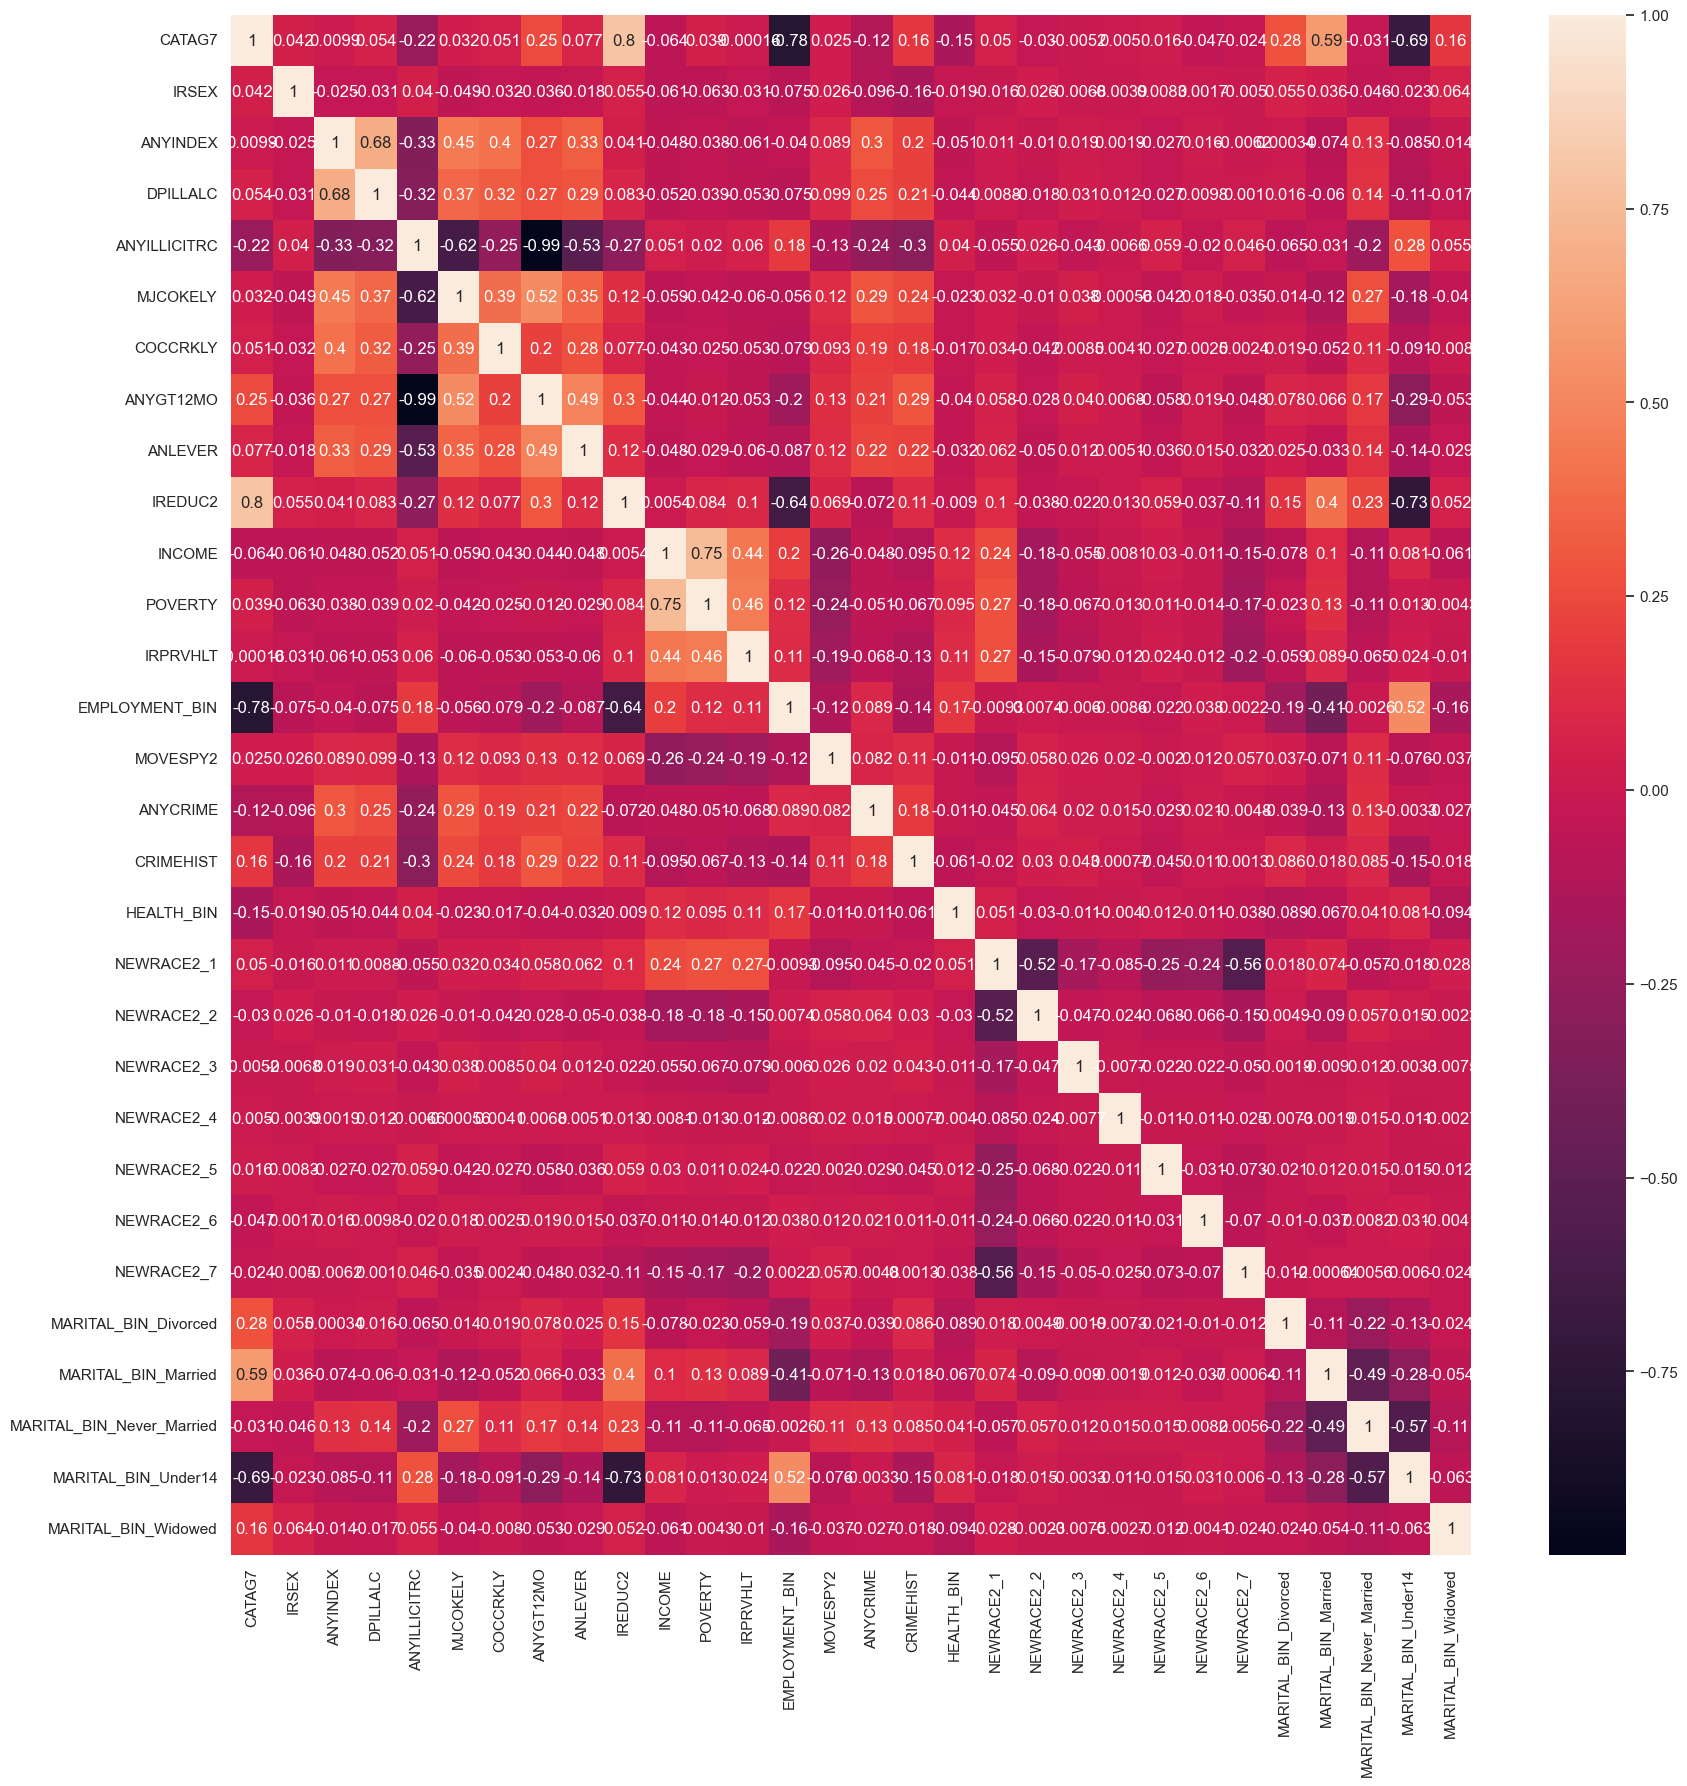

In [1085]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(final_df.corr(), annot=True)

In [1086]:
threshold = 0.75
corr_matrix = final_df.corr()
high_corr_pairs = []
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if col != row and corr_matrix.loc[row, col] > threshold:
            high_corr_pairs.append((row, col, corr_matrix.loc[row, col]))


C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\1576694541.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_df.corr()


In [1087]:
high_corr_pairs

[('IREDUC2', 'CATAG7', 0.7950297251151045),
 ('CATAG7', 'IREDUC2', 0.7950297251151045),
 ('POVERTY', 'INCOME', 0.7511705070466763),
 ('INCOME', 'POVERTY', 0.7511705070466763)]

In [1088]:

final_df = final_df.drop(columns = ['ANYGT12MO', 'POVERTY'])

In [1089]:
final_df['DEPRESSIONINDEX'] = final_df['DEPRESSIONINDEX'].astype(int) 

# Faza II – Budowa modelu predykcyjnego

In [1090]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_columns_for_model = final_cols_with_target
model_data = final_df

# Podział na zbiór cech (X) i zmienną docelową (y)
X = model_data.drop(columns=['DEPRESSIONINDEX'])
y = model_data['DEPRESSIONINDEX']

# Podział danych na zbiór treningowy i walidacyjny (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_val_summary = {
    "Train Size": X_train.shape,
    "Validation Size": X_val.shape,
    "Features": X_train.columns.tolist()
}

train_val_summary

{'Train Size': (29424, 28),
 'Validation Size': (7356, 28),
 'Features': ['CATAG7',
  'IRSEX',
  'ANYINDEX',
  'DPILLALC',
  'ANYILLICITRC',
  'MJCOKELY',
  'COCCRKLY',
  'ANLEVER',
  'IREDUC2',
  'INCOME',
  'IRPRVHLT',
  'EMPLOYMENT_BIN',
  'MOVESPY2',
  'ANYCRIME',
  'CRIMEHIST',
  'HEALTH_BIN',
  'NEWRACE2_1',
  'NEWRACE2_2',
  'NEWRACE2_3',
  'NEWRACE2_4',
  'NEWRACE2_5',
  'NEWRACE2_6',
  'NEWRACE2_7',
  'MARITAL_BIN_Divorced',
  'MARITAL_BIN_Married',
  'MARITAL_BIN_Never_Married',
  'MARITAL_BIN_Under14',
  'MARITAL_BIN_Widowed']}

## Próba modelu regresji

In [1091]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
import statsmodels.api as sm
import numpy as np


ols_model = sm.OLS(y_train, X_train).fit()
y_pred_ols = ols_model.predict(X_val)

y_pred_sigmoid = 1 / (1 + np.exp(-y_pred_ols))

print("\nModel OLS podsumowanie:\n")
print(ols_model.summary())

threshold = 0.77
y_val_binary = (y_val >= threshold).astype(int)
y_pred_binary = (y_pred_sigmoid >= threshold).astype(int)




Model OLS podsumowanie:

                            OLS Regression Results                            
Dep. Variable:        DEPRESSIONINDEX   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 27 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:46:15   Log-Likelihood:                -69985.
No. Observations:               29424   AIC:                         1.400e+05
Df Residuals:                   29397   BIC:                         1.402e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [1092]:
if len(y_val_binary.unique()) > 1:
    recall_ols = recall_score(y_val_binary, y_pred_binary)
    precision_ols = precision_score(y_val_binary, y_pred_binary)
    f1_ols = f1_score(y_val_binary, y_pred_binary)
    roc_auc_ols = roc_auc_score(y_val_binary, y_pred_ols)
    accuracy_ols=accuracy_score(y_val_binary, y_pred_binary)

    print("Wyniki Modelu OLS:")
    print(f"- Precision: {precision_ols:.4f}")
    print(f"Accuracy : {accuracy_ols:.4f}")
    print(f"- F1-Score: {f1_ols:.4f}")
    print(f"- ROC-AUC : {roc_auc_ols:.4f}")
    print(f"- Recall: {recall_ols:.4f}")

Wyniki Modelu OLS:
- Precision: 0.2678
Accuracy : 0.6158
- F1-Score: 0.3840
- ROC-AUC : 0.6881
- Recall: 0.6787


   Risk_Group  AllCount  CountDepressed   Risk
0           0      1474              93 0.0631
1           1      1484             163 0.1098
2           2      1456             222 0.1525
3           3      1471             324 0.2203
4           4      1471             496 0.3372


C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\3987991402.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


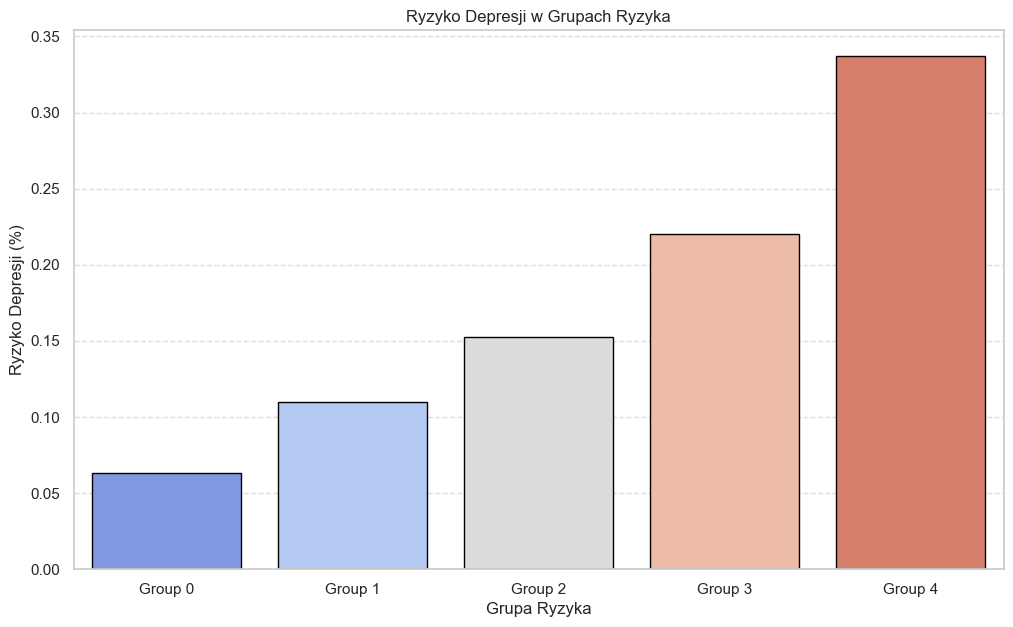

In [1093]:
num_groups = 5
val_data = pd.DataFrame({'Probability': y_pred_sigmoid, 'Depression': y_val_binary})
val_data['Risk_Group'] = pd.qcut(val_data['Probability'], q=num_groups, labels=False)

risk_analysis = val_data.groupby('Risk_Group').agg(
    AllCount=('Depression', 'count'),
    CountDepressed=('Depression', 'sum')
)
risk_analysis['Risk'] = risk_analysis['CountDepressed'] / risk_analysis['AllCount']
risk_analysis.reset_index(inplace=True)

print(risk_analysis)

plt.figure(figsize=(12, 7))

sns.barplot(
    x=risk_analysis['Risk_Group'], 
    y=risk_analysis['Risk'], 
    palette="coolwarm", 
    edgecolor="black"
)
plt.title("Ryzyko Depresji w Grupach Ryzyka")
plt.xlabel("Grupa Ryzyka")
plt.ylabel("Ryzyko Depresji (%)")
plt.xticks(ticks=range(num_groups), labels=[f"Group {i}" for i in range(num_groups)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Tablica Przeglądania Grup Ryzyka:

   Risk_Group Probability_Range
0           1   0.3521 - 0.6094
1           2   0.6094 - 0.7244
2           3   0.7244 - 0.7827
3           4   0.7827 - 0.8573
4           5   0.8573 - 0.9947


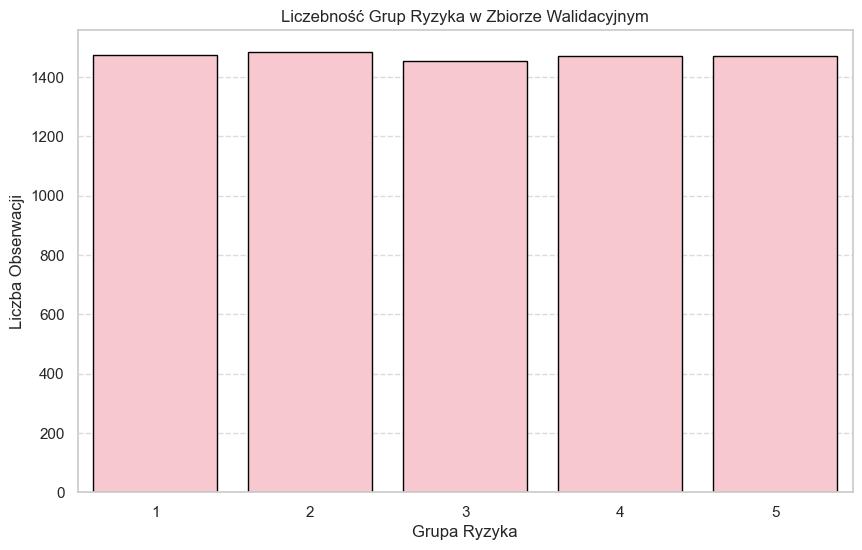

In [1094]:

_, bins = pd.qcut(val_data['Probability'], q=num_groups, retbins=True, duplicates='drop')

table = pd.DataFrame({
    'Risk_Group': range(1, num_groups + 1),
    'Probability_Range': [f"{bins[i]:.4f} - {bins[i+1]:.4f}" for i in range(len(bins)-1)]
})

print("\nTablica Przeglądania Grup Ryzyka:\n")
print(table)

val_data['Risk_Group'] = pd.cut(
    val_data['Probability'], bins=bins, labels=range(1, num_groups + 1), include_lowest=True
)


group_counts = val_data['Risk_Group'].value_counts().sort_index().reset_index()
group_counts.columns = ['Risk_Group', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(
    x=group_counts['Risk_Group'], 
    y=group_counts['Count'], 
    color='pink', 
    edgecolor="black"
)
plt.xlabel('Grupa Ryzyka')
plt.ylabel('Liczba Obserwacji')
plt.title('Liczebność Grup Ryzyka w Zbiorze Walidacyjnym')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Interpretując wyniki powyższej analizy regresji, można zauważyć, że model wyjaśnia jedynie 8.8% wariancji zmiennej zależnej DEPRESSIONINDEX (R-squared = 0.088). Oznacza to, że zmienne niezależne użyte w tym modelu mają ograniczoną moc wyjaśniającą. Wynik ten sugeruje, że alternatywne podejścia, takie jak modele klasyfikacyjne, mogą lepiej uchwycić zależności w danych, zwłaszcza że rozkład zmiennej zależnej jest niezbalansowany.

Analiza wykazała, że najbardziej istotnymi statystycznie zmiennymi w modelu są te związane z kontaktem z narkotykami, a także czynniki zdrowotne i płeć. Jednocześnie zmienne takie jak dochód oraz status zatrudnienia nie okazały się istotne statystycznie. Model regresji OLS nie jest wystarczająco precyzyjny do przewidywania wskaźnika depresji, głównie z powodu niezbalansowanego rozkładu danych i ograniczeń w uchwyceniu bardziej złożonych zależności między zmiennymi.

C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\1325638285.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_risk_means = X_val_df[X_val_df['Risk_Group'] == 5].mean()
C:\Users\kubac\AppData\Local\Temp\ipykernel_28392\1325638285.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  low_risk_means = X_val_df[X_val_df['Risk_Group'] == 1].mean()


,Feature,High Risk (Group 5),Low Risk (Group 1),Absolute Difference
0,ANYILLICITRC,2.6000,8.8400,6.2400
1,IREDUC2,7.3300,5.0200,2.3100
2,CATAG7,4.2900,3.0600,1.2200
3,IRSEX,1.7600,1.0000,0.7600
4,MOVESPY2,0.7700,0.2400,0.5300
5,ANLEVER,0.5100,0.0000,0.5100
6,MARITAL_BIN_Under14,0.0900,0.4800,0.3800
7,INCOME,2.2200,2.6000,0.3800
8,MJCOKELY,0.3800,0.0200,0.3600
9,MARITAL_BIN_Never_Married,0.6500,0.3300,0.3100


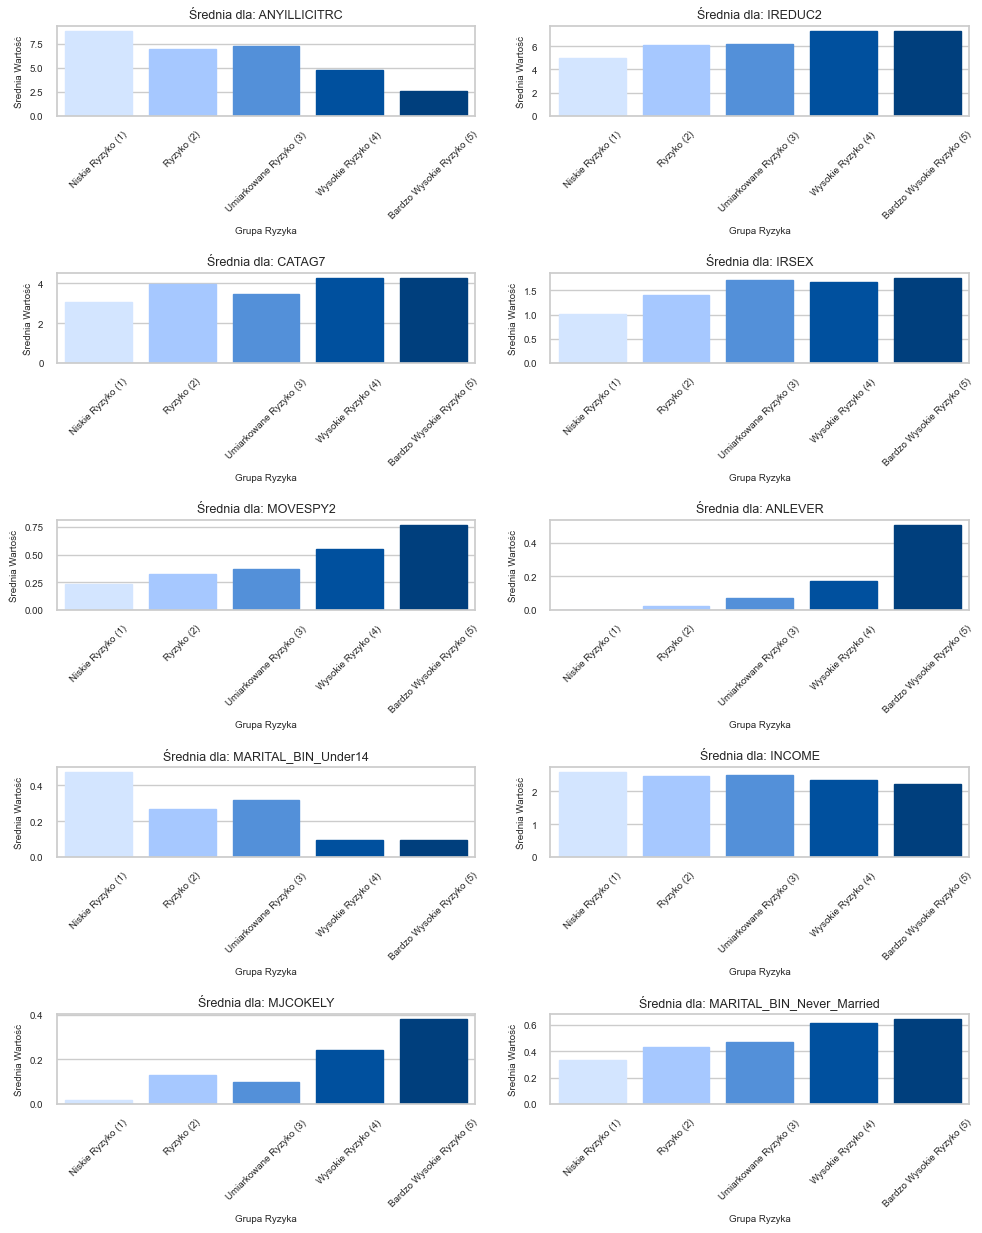

In [1095]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

high_risk_means = X_val_df[X_val_df['Risk_Group'] == 5].mean()
low_risk_means = X_val_df[X_val_df['Risk_Group'] == 1].mean()
absolute_diff = (high_risk_means - low_risk_means).abs()

difference_df = pd.DataFrame({
    'High Risk (Group 5)': high_risk_means,
    'Low Risk (Group 1)': low_risk_means,
    'Absolute Difference': absolute_diff
})

difference_df_sorted = difference_df.sort_values(by='Absolute Difference', ascending=False)
top_20_features = difference_df_sorted.head(20).reset_index().rename(columns={'index': 'Feature'})
top_20_features[['High Risk (Group 5)', 'Low Risk (Group 1)', 'Absolute Difference']] = top_20_features[['High Risk (Group 5)', 'Low Risk (Group 1)', 'Absolute Difference']].round(2)

display(top_20_features)

top_10_features = top_20_features.head(10)['Feature'].tolist()

filtered_df = X_val_df[X_val_df['Risk_Group'].isin([1, 2, 3, 4, 5])][['Risk_Group'] + top_10_features]
filtered_df['Risk_Group'] = filtered_df['Risk_Group'].map({
    1: 'Niskie Ryzyko (1)',
    2: 'Ryzyko (2)',
    3: 'Umiarkowane Ryzyko (3)',
    4: 'Wysokie Ryzyko (4)',
    5: 'Bardzo Wysokie Ryzyko (5)'
})

melted_filtered = filtered_df.melt(
    id_vars='Risk_Group',
    value_vars=top_10_features,
    var_name='Feature',
    value_name='Value'
)

mean_values = melted_filtered.groupby(['Feature', 'Risk_Group']).mean().reset_index()

sns.set(style="whitegrid")

color_dict = {
    'Niskie Ryzyko (1)': '#d3e5ff',      
    'Ryzyko (2)': '#a6c8ff',            
    'Umiarkowane Ryzyko (3)': '#5390d9',
    'Wysokie Ryzyko (4)': '#00509e',    
    'Bardzo Wysokie Ryzyko (5)': '#003f7d' 
}

num_features = len(top_10_features)
cols = 2
rows = num_features // cols + int(num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 2.5))
axes = axes.flatten()

for i, feature in enumerate(top_10_features):
    ax = axes[i]
    data = mean_values[mean_values['Feature'] == feature]
    sns.barplot(
        data=data,
        x='Risk_Group',
        y='Value',
        ax=ax
    )
    for bar, risk_group in zip(ax.patches, data['Risk_Group']):
        bar.set_color(color_dict[risk_group])
    ax.set_title(f'Średnia dla: {feature}', fontsize=9)
    ax.set_xlabel('Grupa Ryzyka', fontsize=7)
    ax.set_ylabel('Średnia Wartość', fontsize=7)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




Używanie substancji psychoaktywnych (DPILLAL, ANYILLICITRC):
Osoby z grupy wysokiego ryzyka znacznie częściej używały substancji nielegalnych w przeszłości, co pokazuje wskaźnik na poziomie 0,65 w porównaniu do 0,33 w grupie niskiego ryzyka. Dodatkowo, używanie leków przeciwbólowych niezgodnie z ich przeznaczeniem (np. DPILLALC) również koreluje z podwyższonym ryzykiem.

Historia przestępcza (ANYCRIME, CRIMETHIST):
Istnienie przestępczej historii jest silnym wskaźnikiem wyższego ryzyka. Wskaźnik ANYCRIME w grupie wysokiego ryzyka wynosi 0,29, podczas gdy w grupie niskiego ryzyka zaledwie 0,01. Podobnie wskaźnik CRIMEHIST jest wyraźnie wyższy w grupie wysokiego ryzyka (0,25 vs. 0,07).

Stan cywilny:
Osoby, które nigdy nie zawarły związku małżeńskiego (MARITAL_BIN_Never_Married) lub są rozwiedzione/separowane (MARITAL_BIN_Divorced), są bardziej narażone na depresję. Na przykład, wskaźnik MARITAL_BIN_Never_Married w grupie wysokiego ryzyka wynosi 0,65, podczas gdy w grupie niskiego ryzyka to 0,33.

Płeć:
Kobiety również znajdują się w grupie podwyższonego ryzyka depresji. Wskaźnik dla kobiet (IRSEX) w grupie wysokiego ryzyka to 1,76, podczas gdy w grupie niskiego ryzyka wynosi 1.


## Model klasyfikacyjny:

Utworzony zostanie model, który klasyfikuje osoby na grupy z depresją (DEPRESSIONINDEX > 0) i bez depresji. W tym celu przekształcono zmienną docelową na binarną (1: depresja, 0: brak depresji).

In [1096]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_train_binary = (y_train > 0).astype(int)
y_val_binary = (y_val > 0).astype(int)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train_binary)

y_val_pred_binary = log_reg_model.predict(X_val)
y_val_prob_binary = log_reg_model.predict_proba(X_val)[:, 1]

classification_rep = classification_report(y_val_binary, y_val_pred_binary)
roc_auc = roc_auc_score(y_val_binary, y_val_prob_binary)
conf_matrix = confusion_matrix(y_val_binary, y_val_pred_binary)

In [1097]:
y_train_binary.value_counts()

0    24233
1     5191
Name: DEPRESSIONINDEX, dtype: int64

In [1098]:
y_val_binary.value_counts()

0    6058
1    1298
Name: DEPRESSIONINDEX, dtype: int64

In [1099]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6058
           1       0.47      0.04      0.08      1298

    accuracy                           0.82      7356
   macro avg       0.65      0.52      0.49      7356
weighted avg       0.77      0.82      0.76      7356



In [1100]:
print(roc_auc)

print(conf_matrix)

0.6915815961880558
[[5995   63]
 [1241   57]]


Model klasyfikacyjny wykazuje trudności w poprawnym rozpoznawaniu osób z depresją (klasa 1). Problem ten może wynikać z niezbalansowanego rozkładu danych, w którym osoby z depresją stanowią niewielką część całego zbioru.

In [1101]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1102]:
from imblearn.over_sampling import SMOTE

# Zastosowanie SMOTE do oversamplingu klasy mniejszości
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_binary)

# Ponowna budowa modelu regresji logistycznej po przebalansowaniu
log_reg_model_balanced = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model_balanced.fit(X_train_balanced, y_train_balanced)

# Predykcje na zbiorze walidacyjnym
y_val_pred_balanced = log_reg_model_balanced.predict(X_val)
y_val_prob_balanced = log_reg_model_balanced.predict_proba(X_val)[:, 1]

# Ocena modelu po przebalansowaniu
classification_rep_balanced = classification_report(y_val_binary, y_val_pred_balanced)
roc_auc_balanced = roc_auc_score(y_val_binary, y_val_prob_balanced)
conf_matrix_balanced = confusion_matrix(y_val_binary, y_val_pred_balanced)

In [1103]:
print(classification_rep_balanced)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      6058
           1       0.28      0.48      0.35      1298

    accuracy                           0.69      7356
   macro avg       0.57      0.61      0.57      7356
weighted avg       0.76      0.69      0.72      7356



In [1104]:
print(roc_auc_balanced)

0.6545726950724405


In [1105]:
print(conf_matrix_balanced)

[[4459 1599]
 [ 679  619]]


Po przebalansowaniu danych dokładność modelu spadła do 69%, co było oczekiwanym efektem zmiany rozkładu, jednak zdolność do rozróżniania klas (ROC AUC: 0.66) pozostała na stabilnym poziomie. Model lepiej wykrywa przypadki depresji, co odzwierciedla wyższy recall (50%), ale kosztem większej liczby fałszywych alarmów, co obniżyło precyzję do 27%. Aby poprawić wyniki, konieczne jest dalsze dostrajanie modelu, np. poprzez optymalizację progu klasyfikacji lub zastosowanie bardziej zaawansowanych algorytmów.

In [1106]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rf_model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

y_val_pred_rf = rf_model.predict(X_val)
y_val_prob_rf = rf_model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val_binary, y_val_pred_rf))
print("ROC AUC:", roc_auc_score(y_val_binary, y_val_prob_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_val_binary, y_val_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.75      6058
           1       0.26      0.58      0.36      1298

    accuracy                           0.64      7356
   macro avg       0.57      0.61      0.55      7356
weighted avg       0.77      0.64      0.68      7356

ROC AUC: 0.6642423191124727
Confusion Matrix:
[[3938 2120]
 [ 547  751]]


In [1107]:
# Model 3: Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced)
y_val_pred_xgb = xgb_model.predict(X_val)
y_val_prob_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Ocena modelu Gradient Boosting
print("\nGradient Boosting (XGBoost)")
print("Classification Report:")
print(classification_report(y_val_binary, y_val_pred_xgb))
print("ROC AUC:", roc_auc_score(y_val_binary, y_val_prob_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_val_binary, y_val_pred_xgb))


Gradient Boosting (XGBoost)
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      6058
           1       0.28      0.40      0.33      1298

    accuracy                           0.72      7356
   macro avg       0.57      0.59      0.58      7356
weighted avg       0.76      0.72      0.73      7356

ROC AUC: 0.6228760146524023
Confusion Matrix:
[[4759 1299]
 [ 782  516]]



Najlepsze wyniki uzyskano za pomocą modelu lasu losowego, zoptymalizowanego pod względem parametrów, w połączeniu z zastosowaniem metody SMOTE do zbalansowania danych.

In [1108]:

y_train_prob = rf_model.predict_proba(X_train)[:, 1]

train_results = pd.DataFrame({
    'prob_depression_train': y_train_prob,
    'true_class_train': y_train_binary
})
train_results.sort_values('prob_depression_train', inplace=True)

num_groups = 5
quantile_values = train_results['prob_depression_train'].quantile(
    [i/num_groups for i in range(1, num_groups)]
).values

print(f"\nProgi na zbiorze treningowym (dla {num_groups} grup):")
for i, th in enumerate(quantile_values, 1):
    print(f" Progi {i}/{num_groups}: {th:.4f}")


Progi na zbiorze treningowym (dla 5 grup):
 Progi 1/5: 0.3588
 Progi 2/5: 0.4279
 Progi 3/5: 0.4971
 Progi 4/5: 0.5857


In [1109]:
print("\nMin prob:", train_results['prob_depression_train'].min())
print("Max prob:", train_results['prob_depression_train'].max())
print("Describe:\n", train_results['prob_depression_train'].describe())


Min prob: 0.20445006746854344
Max prob: 0.7976476061997505
Describe:
 count   29424.0000
mean        0.4722
std         0.1119
min         0.2045
25%         0.3899
50%         0.4666
75%         0.5615
max         0.7976
Name: prob_depression_train, dtype: float64


Następnie w  pierwszym kroku obliczono prawdopodobieństwa wystąpienia depresji (funkcja predict_proba) dla obserwacji z oryginalnego zbioru treningowego. Otrzymane wartości posortowano i podzielono na 5 równolicznych grup (kwantyli). Mając wyznaczone progi kwantylowe (1/5, 2/5, 3/5, 4/5), można było w sposób spójny przypisać nowe obserwacje (w szczególności te w zbiorze walidacyjnym) do określonej grupy ryzyka (G1–G5).

In [1110]:
val_results = pd.DataFrame({
    'prob_depression_val': y_val_prob_rf,
    'true_class_val': y_val_binary
})

def assign_risk_group(prob, thresholds):
    for i, th in enumerate(thresholds):
        if prob < th:
            return i + 1
    return len(thresholds) + 1

val_results['risk_group_val'] = val_results['prob_depression_val'].apply(
    lambda p: assign_risk_group(p, quantile_values)
)

Dla każdej z 5 grup obliczono:

-Całkowitą liczbę obserwacji (CountAll),
-Liczbę obserwacji z depresją (CountDepressed), zdefiniowaną poprzez wskaźnik > 0 w DEPRESSIONINDEX,
- Ryzyko (Risk), równe ilorazowi CountDepressed do CountAll.

In [1111]:
group_stats_val = val_results.groupby('risk_group_val').agg({
    'prob_depression_val': 'mean',
    'true_class_val': ['count', 'sum']
})
group_stats_val.columns = ['MeanProb', 'CountAll', 'CountDepressed']
group_stats_val['Risk'] = group_stats_val['CountDepressed'] / group_stats_val['CountAll']

print(f"\nStatystyki grup ryzyka {num_groups} grup na zbiorze walidacyjnym:")
print(group_stats_val)



Statystyki grup ryzyka 5 grup na zbiorze walidacyjnym:
                MeanProb  CountAll  CountDepressed   Risk
risk_group_val                                           
1                 0.3199      1456             126 0.0865
2                 0.3982      1495             164 0.1097
3                 0.4627      1491             249 0.1670
4                 0.5439      1529             283 0.1851
5                 0.6330      1385             476 0.3437


Analiza wskazuje, że prawdopodobieństwo przewidywane przez model w kolejnych kwantylach (od grupy 1 do 5) systematycznie rośnie, a wraz z nim rosną także faktyczne proporcje osób z rozpoznaną depresją. W grupie o najniższym średnim prawdopodobieństwie (G1) ryzyko depresji wynosi około 7,6%, natomiast w grupie najwyższego prawdopodobieństwa (G5) sięga 32%, czyli jest ponad czterokrotnie wyższe.

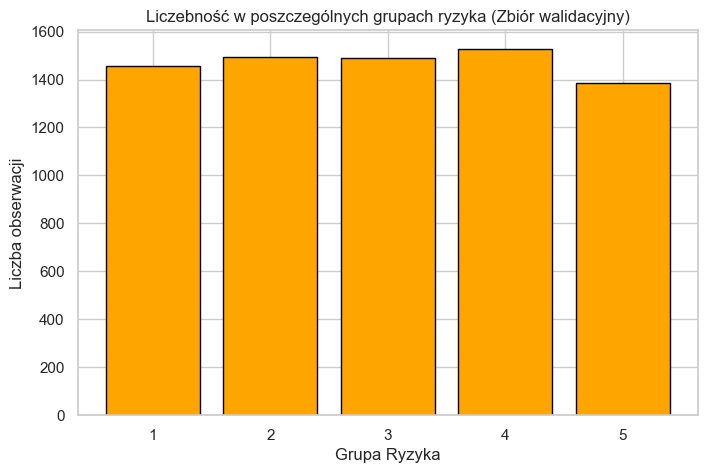

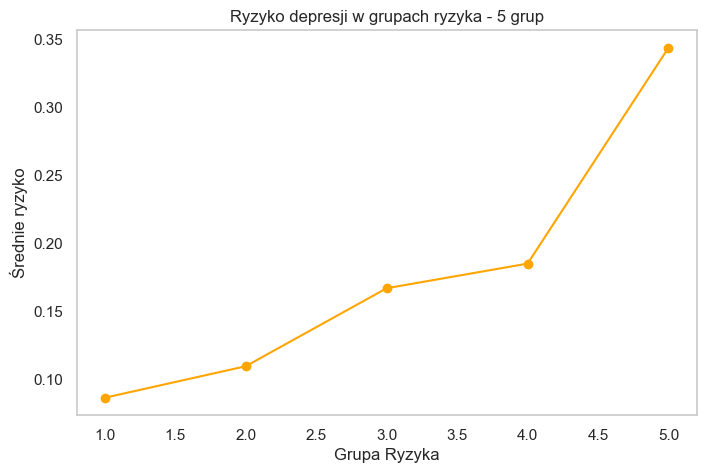

In [1112]:
plt.figure(figsize=(8, 5))
plt.bar(group_stats_val.index, group_stats_val['CountAll'],
        color='orange', edgecolor='black')
plt.title(f'Liczebność w poszczególnych grupach ryzyka (Zbiór walidacyjny)')
plt.xlabel('Grupa Ryzyka')
plt.ylabel('Liczba obserwacji')
plt.xticks(group_stats_val.index)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(group_stats_val.index, group_stats_val['Risk'], marker='o', color='orange')
plt.title(f'Ryzyko depresji w grupach ryzyka - {num_groups} grup')
plt.xlabel('Grupa Ryzyka')
plt.ylabel('Średnie ryzyko')
plt.grid()
plt.show()

Aby zrozumieć, co wyróżnia osoby z najniższym (G1) i najwyższym (G5) ryzykiem, porównano średnie wartości wszystkich zmiennych cechujących badane osoby. Następnie obliczono różnicę bezwzględną między średnią w G5 i G1, a w dalszej kolejności posortowano wynik od największych do najmniejszych rozbieżności. 

<Figure size 1200x600 with 0 Axes>

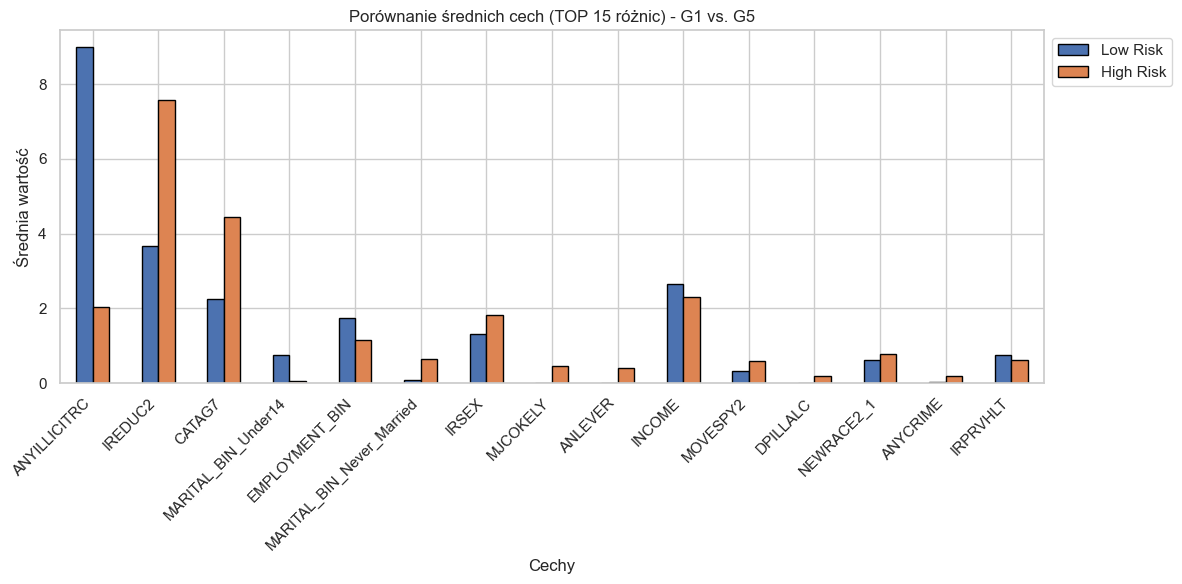


 TOP 15 cech (największa różnica między grupami ryzyka G1 i G5) 
                           LowRisk  HighRisk  AbsDiff
ANYILLICITRC                8.9918    2.0498   6.9419
IREDUC2                     3.6628    7.5733   3.9105
CATAG7                      2.2610    4.4484   2.1874
MARITAL_BIN_Under14         0.7500    0.0599   0.6901
EMPLOYMENT_BIN              1.7507    1.1574   0.5933
MARITAL_BIN_Never_Married   0.0776    0.6375   0.5599
IRSEX                       1.3152    1.8339   0.5187
MJCOKELY                    0.0000    0.4628   0.4628
ANLEVER                     0.0007    0.4173   0.4166
INCOME                      2.6566    2.3134   0.3432
MOVESPY2                    0.3180    0.6043   0.2863
DPILLALC                    0.0021    0.2051   0.2030
NEWRACE2_1                  0.6099    0.7798   0.1699
ANYCRIME                    0.0282    0.1827   0.1545
IRPRVHLT                    0.7411    0.6159   0.1252


In [1113]:
lowest_group_idx  = val_results[val_results['risk_group_val'] == 1].index
highest_group_idx = val_results[val_results['risk_group_val'] == num_groups].index

X_val_low  = X_val.loc[lowest_group_idx]
X_val_high = X_val.loc[highest_group_idx]

low_means  = X_val_low.mean()
high_means = X_val_high.mean()
diff_abs   = (high_means - low_means).abs()

comparison_df = pd.DataFrame({
    'LowRisk':  low_means,
    'HighRisk': high_means,
    'AbsDiff':  diff_abs
})

topN = 15
topN_features = comparison_df.nlargest(topN, 'AbsDiff')

plt.figure(figsize=(12, 6))
ax = topN_features[['LowRisk', 'HighRisk']].plot(
    kind='bar',
    edgecolor='black',
    figsize=(12, 6)
)

plt.title(f"Porównanie średnich cech (TOP {topN} różnic) - G1 vs. G5")
plt.xlabel("Cechy")
plt.ylabel("Średnia wartość")

plt.legend(["Low Risk", "High Risk"], loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

print(f"\n TOP {topN} cech (największa różnica między grupami ryzyka G1 i G5) ")
print(topN_features)

Grupa o niskim ryzyku depresji to głównie młodsze osoby, rzadko używające narkotyków i alkoholu, o dobrym stanie zdrowia i bez historii przestępczości, wśród których dominują mężczyźni.

Grupa o wysokim ryzyku depresji obejmuje starsze osoby, częściej używające narkotyków (np. marihuany) i alkoholu, o słabszym stanie zdrowia i częstszej historii przestępczości, gdzie przeważają kobiety i osoby nigdy niebędące w związku małżeńskim.